### 1. Important libararies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import math

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# CLass imbalance
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

#imputer
from sklearn.impute import SimpleImputer

#scaler
from sklearn. preprocessing import StandardScaler

#metrics
from sklearn.metrics import recall_score

# Train test split
from sklearn.model_selection import train_test_split

##Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier


#suppress warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Reading the dataset

In [3]:
#Reading the dataset
df = pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
#Chekcing out the shape
print('Total Number of Rows:',df.shape[0])
print('Total Number of Columns:',df.shape[1])

Total Number of Rows: 99999
Total Number of Columns: 226


### 2.1 Checking out the datatypes of the columns

In [5]:
## Checking datatype
print('Number of columns with datatype string:',df.select_dtypes('object').shape[1])
print('Number of columns with datatype int/float:',df.select_dtypes('number').shape[1])

Number of columns with datatype string: 12
Number of columns with datatype int/float: 214


### 2.2 Checking the total null values in the dataset

In [6]:
## Checking null values beyond the threshold value of 10%
null_percentage = df.isnull().sum()/len(df)*100
null_percentage[null_percentage>10]

date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
total_rech_data_6           74.846748
total_rech_data_7           74.428744
total_rech_data_8           73.660737
total_rech_data_9           74.077741
max_rech_data_6             74.846748
max_rech_data_7             74.428744
max_rech_data_8             73.660737
max_rech_data_9             74.077741
count_rech_2g_6             74.846748
count_rech_2g_7             74.428744
count_rech_2g_8             73.660737
count_rech_2g_9             74.077741
count_rech_3g_6             74.846748
count_rech_3g_7             74.428744
count_rech_3g_8             73.660737
count_rech_3g_9             74.077741
av_rech_amt_data_6          74.846748
av_rech_amt_data_7          74.428744
av_rech_amt_data_8          73.660737
av_rech_amt_data_9          74.077741
arpu_3g_6                   74.846748
arpu_3g_7                   74.428744
arpu_3g_8   

In [7]:
len(null_percentage[null_percentage>10])

40

- There are 40 columns as per our observation which have a high null value percentage and we ceratinly would have to drop them however lets decide it once we have filtered our high value customers.

### 2.3 Checking the statistical description of the numerical columns

In [8]:
#statistical analysis
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


### 2.4 Checking the number of columns specified for each month

In [9]:
#columns 
columns= df.columns
pattern_june=r'_6$'
pattern_july=r'_7$'
pattern_aug=r'_8$'
pattern_sep=r'_9$'
june_month=0
july_month=0
aug_month=0
sep_month=0

for i in columns:
    if re.search(pattern_june,i):
        june_month+=1
    elif re.search(pattern_july,i):
        july_month+=1
    elif re.search(pattern_aug,i):
        aug_month+=1
    elif re.search(pattern_sep,i):
        sep_month+=1
print('Total variables denoting Month of June:',june_month)
print('Total variables denoting Month of July:',july_month)
print('Total variables denoting Month of Aug:',aug_month)
print('Total variables denoting Month of Sep:',sep_month)

Total variables denoting Month of June: 54
Total variables denoting Month of July: 54
Total variables denoting Month of Aug: 54
Total variables denoting Month of Sep: 54


### 2.5 Checking for duplicate values 

In [10]:
df[df.duplicated()]

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g


- There are no duplicate values also present in the dataset

### 2.6 Checking the unique phone number values

In [11]:
len(df['mobile_number'].unique())

99999

- Here we can conclude that the data is for 99999 unique customers.

# 3. Selecting high value customers

In [12]:
#Since high value customers constitue 80% of the revenue of the telecom operator we need to retain them
df1 = df.copy()

In [13]:
# As per our inspection the total recharges of the customers following different months are in the columns 'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8' and 'total_rech_amt_9'
#Let's find our the average recharge amount for the first 2 months i.e for 6 and 7 month
average_amount_for_good_phase=(df1['total_rech_amt_6']+df1['total_rech_amt_7'])/2
average_amount_for_good_phase

0        307.0
1        229.0
2        241.5
3        270.0
4        273.0
         ...  
99994     85.0
99995    110.0
99996     59.5
99997    369.5
99998    355.0
Length: 99999, dtype: float64

In [14]:
#Finding 70th percentile of the average recharge amount in first 2 months
percentile = np.percentile(a=average_amount_for_good_phase,q=70)
percentile

368.5

- Here we would like to sort out customers whose average recharge amount is >=368.5.

### 3.1 Sorting out the customers based on threshold

In [15]:
df1 = df1[(df1['total_rech_amt_6']+df1['total_rech_amt_7'])/2>=368.5]
df1.shape

(30011, 226)

- It is quite evident that from 99999 customers 30011 are selected.
- This is also approximately equal to the number '29.9K' customers mentioned in the problem statement after filtering.

## 4. PreProcessing

### 4.1 Handling Null values

In [16]:
null_perc = df1.isnull().sum()/len(df1)*100
null_perc[null_perc>10]

date_of_last_rech_data_6    62.023925
date_of_last_rech_data_7    61.140915
date_of_last_rech_data_8    60.834361
date_of_last_rech_data_9    61.810669
total_rech_data_6           62.023925
total_rech_data_7           61.140915
total_rech_data_8           60.834361
total_rech_data_9           61.810669
max_rech_data_6             62.023925
max_rech_data_7             61.140915
max_rech_data_8             60.834361
max_rech_data_9             61.810669
count_rech_2g_6             62.023925
count_rech_2g_7             61.140915
count_rech_2g_8             60.834361
count_rech_2g_9             61.810669
count_rech_3g_6             62.023925
count_rech_3g_7             61.140915
count_rech_3g_8             60.834361
count_rech_3g_9             61.810669
av_rech_amt_data_6          62.023925
av_rech_amt_data_7          61.140915
av_rech_amt_data_8          60.834361
av_rech_amt_data_9          61.810669
arpu_3g_6                   62.023925
arpu_3g_7                   61.140915
arpu_3g_8   

In [17]:
#Checking out the length of high percentage null value columns
len(null_perc[null_perc>10])

40

In [18]:
#Let's now remove the columns
null_perc_index = null_perc[null_perc>10].index
null_perc_index

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [19]:
#Drop the columns
df1.drop(null_perc_index,axis=1,inplace=True)

In [20]:
df1.shape

(30011, 186)

### 4.1.2 Dropping the date columns for convenience

In [21]:
#Let's checkout the columns have date in them
pattern = r'date'
date_column=[]
for column in list(df1.columns):
    if re.search(pattern,column):
        date_column.append(column)

In [22]:
# selecting only the first 4 columns
date_column = date_column[:4]
df1.drop(date_column,axis=1,inplace=True)

In [23]:
df1.shape

(30011, 182)

- Finally there is 182 columns present as of now

## 4.2. Imputing null values

In [24]:
null_val = df1.isnull().sum()
list(null_val[null_val>0].index)

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_t2

In [25]:
#numerical and categorical columns
num_features = list(df1.select_dtypes('number').columns)
cat_features = list(df1.select_dtypes('object').columns)

In [26]:
print(len(num_features))
print(len(cat_features))

178
4


In [27]:
#Let's find out the numerical and categorical columns separately
null_cols = list(null_val[null_val>0].index)

In [28]:
null_num_features=[]
null_cat_features=[]
for i in null_cols:
    if i in num_features:
        null_num_features.append(i)
    elif i in cat_features:
        null_cat_features.append(i)

In [29]:
# Let's observe the null_cat_features
null_cat_features

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

### 4.2.1 Imputing the numerical values

In [30]:
# We can impute the numerical values as median of the column to be on a safer side
for features in null_num_features:
    median_value = np.median(df1[features])
    if np.isnan(median_value):
        median_value=0
    df1[features].fillna(median_value,inplace=True)

In [31]:
#checking out the total null values after imputation
df1[null_num_features].isnull().sum().sum()

0

In [32]:
#finding out the columns having the same value throughout the column
l =[]
for features in null_num_features:
    count = df1[features].value_counts()[0]
    if count==len(df1):
        l.append(features)

In [33]:
#Finding out the values of the columns in l
for i in l:
    print(i,'\n',df1[i].value_counts())

loc_og_t2o_mou 
 0.0    30011
Name: loc_og_t2o_mou, dtype: int64
std_og_t2o_mou 
 0.0    30011
Name: std_og_t2o_mou, dtype: int64
loc_ic_t2o_mou 
 0.0    30011
Name: loc_ic_t2o_mou, dtype: int64
std_og_t2c_mou_6 
 0.0    30011
Name: std_og_t2c_mou_6, dtype: int64
std_og_t2c_mou_7 
 0.0    30011
Name: std_og_t2c_mou_7, dtype: int64
std_og_t2c_mou_8 
 0.0    30011
Name: std_og_t2c_mou_8, dtype: int64
std_og_t2c_mou_9 
 0.0    30011
Name: std_og_t2c_mou_9, dtype: int64
std_ic_t2o_mou_6 
 0.0    30011
Name: std_ic_t2o_mou_6, dtype: int64
std_ic_t2o_mou_7 
 0.0    30011
Name: std_ic_t2o_mou_7, dtype: int64
std_ic_t2o_mou_8 
 0.0    30011
Name: std_ic_t2o_mou_8, dtype: int64
std_ic_t2o_mou_9 
 0.0    30011
Name: std_ic_t2o_mou_9, dtype: int64


In [34]:
#Let's remove all these columns also since every row contains the value 0
df1.drop(l,axis=1,inplace=True)
df1.shape

(30011, 171)

###  4.2.2 Imputing the categorical variables

In [35]:
#checking total null values
df1[null_cat_features].isnull().sum()

date_of_last_rech_6     62
date_of_last_rech_7    114
date_of_last_rech_8    594
date_of_last_rech_9    866
dtype: int64

In [36]:
#imputing the categorical variables
for features in cat_features:
    mode_value = df1[features].value_counts().mode()[0]
    df1[null_cat_features] = df1[null_cat_features].fillna(mode_value)

In [37]:
#Null values after imputing mode
df1[null_cat_features].isnull().sum().sum()

0

### 4.2.3 Total null values of df1

In [38]:
df1.isnull().sum().sum()

0

## 4.3. Tag Churners as per the month of September

In [39]:
#Churners need to be tagged 0:Not Churned and 1:Churned as per 4 columns for the month of September
churn_col = ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']

#As per problem statement those who have not made any calls and not used mobile internet even once in churn phase are churners
index = df1[df1['total_ic_mou_9']+df1['total_og_mou_9']+df1['vol_2g_mb_9']+df1['vol_3g_mb_9']==0][churn_col].index

#Let's just add up a new columns and then tag then as churn/no churn
df1['churn'] = 0
#set the values at index=1 whoever has churned
df1.loc[index,'churn']=1

In [40]:
#checking out the value_counts()
df1.churn.value_counts(normalize=True)*100

0    91.359835
1     8.640165
Name: churn, dtype: float64

- Only 8.6% of the total high value customers are churners. This is clearly an imbalanced dataset

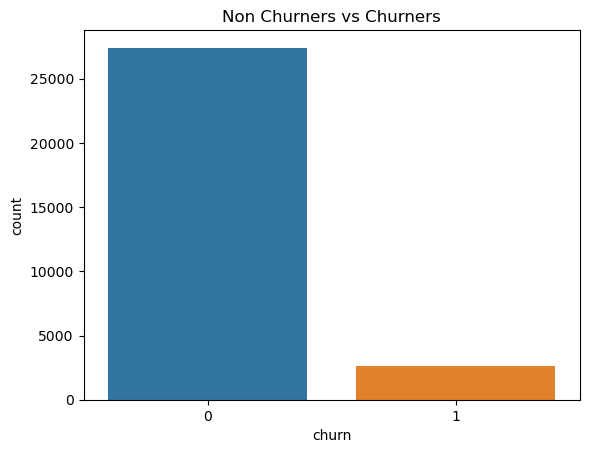

In [41]:
#Plotting a countplot also
plt.figure()
sns.countplot(data=df1,x='churn')
plt.title('Non Churners vs Churners')
plt.show()

### 4.3.1 Dropping the columns for 9month

In [42]:
# This is because we have to predict for the 9th month if the customers will churn or not and we will not have the data in hand prior
pattern = r'_9'
l = []
for features in df1.columns:
    if re.search(pattern,features):
        l.append(features)

In [43]:
df1.drop(l,axis=1,inplace=True)
df1.shape

(30011, 131)

## 4.4 Creating the good_phase and action_phase dataframe

In [44]:
#Let's first divide the dataset into 2 categories as mentioned in the problem statement
#good phase: selecting all the columns having _6 and _7 at the last
pattern1 = r'_6'
pattern2 = r'_7'
l = []
for features in df1.columns:
    if re.search(pattern1,features):
        l.append(features)
for features in df1.columns:
    if re.search(pattern2,features):
        l.append(features)
good_phase = df1[l]

In [45]:
good_phase.shape

(30011, 82)

In [46]:
#action phase: where the behaviour of the customer changes
pattern3 = r'_8'
m = []
for features in df1.columns:
    if re.search(pattern3,features):
        m.append(features)
action_phase = df1[m]
action_phase.shape

(30011, 41)

In [47]:
#checking out the cols not included in both of good_phase and action_phase
col_not_incl = []
for i in df1.columns:
    if i not  in l and i not in m:
        col_not_incl.append(i)

In [48]:
col_not_incl

['mobile_number',
 'circle_id',
 'aon',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'sep_vbc_3g',
 'churn']

In [49]:
#Dropping the 'sep_vbc_3g' column since it is part of the 9th month
df1.drop('sep_vbc_3g',axis=1,inplace=True)

In [50]:
#adding the other columns to that of good_phase and action_phase separately
col_not_incl1 = [i for i in col_not_incl if i not in ('aug_vbc_3g','sep_vbc_3g')] 
good_phase = pd.concat([good_phase,df1[col_not_incl1]],axis=1)
good_phase.shape

(30011, 88)

In [51]:
col_not_incl2 = [i for i in col_not_incl if i not in ('jul_vbc_3g','jun_vbc_3g','sep_vbc_3g')]
action_phase = pd.concat([action_phase,df1[col_not_incl2]],axis=1)
action_phase.shape

(30011, 46)

### 4.4.1 Good Phase dataset

In [52]:
#creating new columns
good_phase2 = pd.DataFrame()
#### 1.arpu
good_phase2['arpu'] = (good_phase['arpu_6']+good_phase['arpu_7'])/2

#### 2.All kinds of calls within same operator network
good_phase2['onnet'] = (good_phase['onnet_mou_6']+good_phase['onnet_mou_7'])/2

#### 3.All kinds of calls within different operator network
good_phase2['offnet'] = (good_phase['offnet_mou_6']+good_phase['offnet_mou_7'])/2


##### 4.Roaming calls

#Total incoming Roaming calls

good_phase2['total_roam_ic']  = (good_phase['roam_ic_mou_6']+good_phase['roam_ic_mou_7'])/2

#Total outgoing Roaming calls
good_phase2['total_roam_og']=(good_phase['roam_og_mou_6']+good_phase['roam_og_mou_7'])/2

###### 5.Outgoing calls

#Total Local outgoing calls to same network
good_phase2['total_local_og_t2t']=(good_phase['loc_og_t2t_mou_6']+good_phase['loc_og_t2f_mou_6']+good_phase['loc_og_t2c_mou_6']+good_phase['loc_og_t2t_mou_7']+good_phase['loc_og_t2f_mou_7']+good_phase['loc_og_t2c_mou_7'])/2

# Local outgoing calls to different network
good_phase2['total_local_og_t2o'] = (good_phase['loc_og_t2m_mou_6']+good_phase['loc_og_t2m_mou_7'])/2

#  std outgoing calls to same network
good_phase2['total_std_og_t2t'] =(good_phase['std_og_t2t_mou_6']+good_phase['std_og_t2f_mou_6']+good_phase['std_og_t2t_mou_7']+good_phase['std_og_t2f_mou_7'])/2

# std outgoing calls to other network
good_phase2['total_std_og_t2o'] = (good_phase['std_og_t2m_mou_6']+good_phase['std_og_t2m_mou_7'])/2

# isd, spl calls and others
good_phase2['total_og_others'] = (good_phase['isd_og_mou_6']+good_phase['spl_og_mou_6']+good_phase['og_others_6']+good_phase['isd_og_mou_7']+good_phase['spl_og_mou_7']+good_phase['og_others_7'])/2

#Total og calls
good_phase2['total_og'] = good_phase2['total_local_og_t2t']+good_phase2['total_local_og_t2o']+good_phase2['total_std_og_t2t']+good_phase2['total_std_og_t2o']+good_phase2['total_og_others']


###### 6. Incoming calls

##Local incoming calls from same network
good_phase2['total_local_ic_t2t'] = (good_phase['loc_ic_t2t_mou_6']+good_phase['loc_ic_t2f_mou_6']+good_phase['loc_ic_t2t_mou_7']+good_phase['loc_ic_t2f_mou_7'])/2
    
#Local incoming calls from other network
good_phase2['total_local_ic_t2o'] = (good_phase['loc_ic_t2m_mou_6']+good_phase['loc_ic_t2m_mou_7'])/2

# Std incoming calls from same network
good_phase2['total_std_ic_t2t']=(good_phase['std_ic_t2t_mou_6']+good_phase['std_ic_t2f_mou_6'] +good_phase['std_ic_t2t_mou_7']+good_phase['std_ic_t2f_mou_7'])/2

#std incoming calls from other network
good_phase2['total_std_ic_t2o']=(good_phase['std_ic_t2m_mou_6']+good_phase['std_ic_t2m_mou_7'])/2

#spl, isd, and other incoming calls
good_phase2['total_ic_others'] = (good_phase['spl_ic_mou_6']+good_phase['isd_ic_mou_6']+good_phase['ic_others_6']+good_phase['spl_ic_mou_7']+good_phase['isd_ic_mou_7']+good_phase['ic_others_7'])/2

#Total incoming calls
good_phase2['total_ic'] = good_phase2['total_local_ic_t2t']+good_phase2['total_local_ic_t2o']+good_phase2['total_std_ic_t2t']+good_phase2['total_std_ic_t2o']+ good_phase2['total_ic_others']



##### 7. recharge amount
good_phase2['total_amnt_recharge']=(good_phase['total_rech_amt_6']+good_phase['total_rech_amt_7'])/2

##### 8. Maximum recharge amount
good_phase2['max_recharge_amount'] = (good_phase['max_rech_amt_6']+good_phase['max_rech_amt_7'])/2

##### 9. Last day recharge amount
good_phase2['last_day_recharge_amnt'] = (good_phase['last_day_rch_amt_6']+good_phase['last_day_rch_amt_7'])/2

###### 10.Average 2g usage 
pattern=r'2g'
l =[]
for i in good_phase.columns:
    if re.search(pattern,i):
        l.append(i)
good_phase2['total_2g_internet_usage'] = 0
for i in l:
    good_phase2['total_2g_internet_usage']+=good_phase[i]
good_phase2['total_2g_internet_usage'] = good_phase2['total_2g_internet_usage']/2

##### 11.Average 3g usage 
pattern=r'3g'
l =[]
for i in good_phase.columns:
    if re.search(pattern,i):
        l.append(i)
good_phase2['total_3g_internet_usage'] = 0
for i in l:
    good_phase2['total_3g_internet_usage']+=good_phase[i]
good_phase2['total_3g_internet_usage'] = good_phase2['total_3g_internet_usage']/2

##### 12.circle id
good_phase2['circle_id'] = good_phase['circle_id']

##### 13. aon
good_phase2['aon'] = good_phase['aon']

##### 14.Average vbc amount
good_phase2['vbc'] = (good_phase['jul_vbc_3g']+good_phase['jun_vbc_3g'])/2

##### 15.churn
good_phase2['churn'] = good_phase['churn']

In [53]:
good_phase2.head()

,arpu,onnet,offnet,total_roam_ic,total_roam_og,total_local_og_t2t,total_local_og_t2o,total_std_og_t2t,total_std_og_t2o,total_og_others,...,total_ic,total_amnt_recharge,max_recharge_amount,last_day_recharge_amnt,total_2g_internet_usage,total_3g_internet_usage,circle_id,aon,vbc,churn
7,1209.5150,56.260,510.295,24.860,18.165,100.020,378.005,27.165,40.825,2.340,...,592.190,1185.0,1185.0,0.0,0.0,19.06,109,802,19.060,1
8,435.4720,382.360,87.645,0.000,0.000,257.360,75.770,124.995,11.865,0.000,...,66.165,519.0,122.0,25.0,179.0,891.88,109,315,516.405,0
13,349.2585,305.075,266.295,83.885,21.620,30.180,99.205,266.195,154.150,0.000,...,570.565,380.0,110.0,80.0,0.0,0.00,109,2607,0.000,0
16,365.4220,62.260,263.015,1.415,8.870,56.125,209.640,5.235,43.750,1.630,...,373.180,459.0,110.0,100.0,0.0,12.17,109,511,12.170,0
17,354.4940,597.595,30.820,2.380,4.230,19.495,29.270,573.860,0.775,1.755,...,47.085,408.0,55.0,15.0,0.0,0.00,109,667,0.000,0


### 4.4.2 Action Phase

In [54]:
#Let's make the action phase dataset in the  same way as of good_phase
action_phase2 = pd.DataFrame()

#### 1. arpu
action_phase2['arpu'] = action_phase['arpu_8']

#### 2. onnet and offnet
action_phase2['onnet'] = action_phase['onnet_mou_8']
action_phase2['offnet'] = action_phase['offnet_mou_8']

#### 3. Roaming calls
action_phase2['total_roam_ic'] = action_phase['roam_ic_mou_8']
action_phase2['total_roam_og'] = action_phase['roam_og_mou_8']

#### 4. Outgoing calls
action_phase2['total_local_og_t2t'] = action_phase['loc_og_t2t_mou_8']+action_phase['loc_og_t2f_mou_8']+action_phase['loc_og_t2c_mou_8']
action_phase2['total_local_og_t2o'] = action_phase['loc_og_t2m_mou_8']
action_phase2['total_std_og_t2t'] =action_phase['std_og_t2t_mou_8']+action_phase['std_og_t2f_mou_8']
action_phase2['total_std_og_t2o'] =action_phase['std_og_t2m_mou_8']
action_phase2['total_og_others'] =action_phase['isd_og_mou_8']+action_phase['spl_og_mou_8']+action_phase['og_others_8']
action_phase2['total_og'] = action_phase2['total_local_og_t2t']+action_phase2['total_local_og_t2o']+action_phase2['total_std_og_t2t']+action_phase2['total_std_og_t2o']+action_phase2['total_og_others']

#### 5. Incoming calls
action_phase2['total_local_ic_t2t'] = action_phase['loc_ic_t2t_mou_8']+action_phase['loc_ic_t2f_mou_8']
action_phase2['total_local_ic_t2o'] = action_phase['loc_ic_t2m_mou_8']
action_phase2['total_std_ic_t2t']=action_phase['std_ic_t2t_mou_8']+action_phase['std_ic_t2f_mou_8']
action_phase2['total_std_ic_t2o']=action_phase['std_ic_t2m_mou_8']
action_phase2['total_ic_others']=action_phase['spl_ic_mou_8']+action_phase['isd_ic_mou_8']+action_phase['ic_others_8']
action_phase2['total_ic'] =action_phase2['total_local_ic_t2t']+action_phase2['total_local_ic_t2o']+action_phase2['total_std_ic_t2t']+action_phase2['total_std_ic_t2o']+action_phase2['total_ic_others']

#### 6.Total recharge amount
action_phase2['total_amnt_recharge'] = action_phase['total_rech_amt_8']

#### 7. Maximum recharge amount
action_phase2['max_recharge_amount'] = action_phase['max_rech_amt_8']

#### 8.Last day recharge amount
action_phase2['last_day_recharge_amnt']=action_phase['last_day_rch_amt_8']

#### 9. 2g usage 
pattern=r'2g'
l =[]
for i in action_phase.columns:
    if re.search(pattern,i):
        l.append(i)
action_phase2['total_2g_internet_usage'] = 0
for i in l:
    action_phase2['total_2g_internet_usage']+=action_phase[i]



##### 10. Average 3g usage 
pattern=r'3g'
l =[]
for i in action_phase.columns:
    if re.search(pattern,i):
        l.append(i)
action_phase2['total_3g_internet_usage'] = 0
for i in l:
    action_phase2['total_3g_internet_usage']+=action_phase[i]


##### 11.circle id
action_phase2['circle_id'] = action_phase['circle_id']

##### 12. aon
action_phase2['aon'] = action_phase['aon']

##### 14.Average vbc amount
action_phase2['vbc'] = action_phase['aug_vbc_3g']


##### 15. churn
action_phase2['churn'] = action_phase['churn']

In [55]:
action_phase2.head()

,arpu,onnet,offnet,total_roam_ic,total_roam_og,total_local_og_t2t,total_local_og_t2o,total_std_og_t2t,total_std_og_t2o,total_og_others,...,total_ic,total_amnt_recharge,max_recharge_amount,last_day_recharge_amnt,total_2g_internet_usage,total_3g_internet_usage,circle_id,aon,vbc,churn
7,3171.480,52.29,325.91,31.64,38.06,93.51,162.28,28.69,49.14,16.51,...,428.69,3638,1580,779,0.00,57.74,109,802,57.74,1
8,137.362,35.08,136.48,0.00,0.00,19.64,50.54,22.58,75.69,10.23,...,16.54,120,30,10,3.03,32.97,109,315,21.03,0
13,593.260,534.24,482.46,72.11,1.44,60.01,294.46,498.23,156.94,6.07,...,1144.48,717,130,0,3.02,0.00,109,2607,0.00,0
16,187.894,70.61,162.76,0.00,0.00,77.64,128.28,3.23,18.29,5.91,...,294.43,160,130,130,0.00,0.00,109,511,0.00,0
17,25.499,7.79,5.54,4.81,13.34,0.00,0.00,0.00,0.00,0.00,...,0.00,30,30,0,0.00,0.00,109,667,0.00,0


### 4.4.3 Checking out the final columns we have created

In [56]:
action_phase2.columns

Index(['arpu', 'onnet', 'offnet', 'total_roam_ic', 'total_roam_og',
       'total_local_og_t2t', 'total_local_og_t2o', 'total_std_og_t2t',
       'total_std_og_t2o', 'total_og_others', 'total_og', 'total_local_ic_t2t',
       'total_local_ic_t2o', 'total_std_ic_t2t', 'total_std_ic_t2o',
       'total_ic_others', 'total_ic', 'total_amnt_recharge',
       'max_recharge_amount', 'last_day_recharge_amnt',
       'total_2g_internet_usage', 'total_3g_internet_usage', 'circle_id',
       'aon', 'vbc', 'churn'],
      dtype='object')

- We will be making predictions on the basis of these features

### 4.4.4 Adding one more column of date of last recharge for the objects variable

In [57]:
#Let's add the date of last recharge 

good_phase2['date_of_last_rech'] = ((pd.to_datetime(good_phase['date_of_last_rech_6']).dt.day + pd.to_datetime(good_phase['date_of_last_rech_7']).dt.day)/2).apply(lambda x:math.ceil(x))
action_phase2['date_of_last_rech'] = pd.to_datetime(action_phase['date_of_last_rech_8']).dt.day

## 5. Exploratory data analysis

### 5.1 Let's check the churn variable first 

In [58]:
good_phase2['churn'].value_counts(normalize=True)

0    0.913598
1    0.086402
Name: churn, dtype: float64

- This is a clear case of data imbalance however we will make it right afterwards

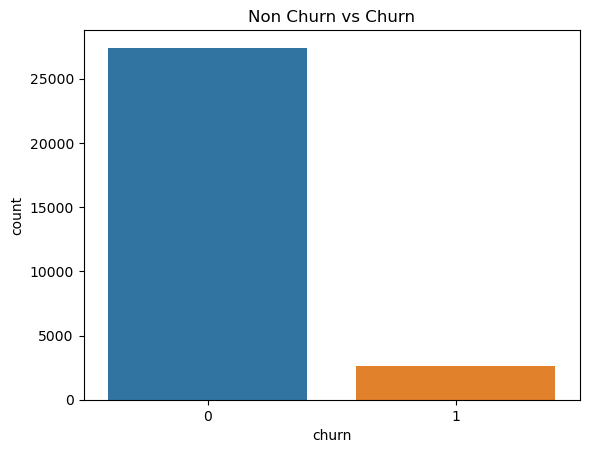

In [59]:
plt.figure()
sns.countplot(data=good_phase2,x='churn')
plt.title('Non Churn vs Churn')
plt.show()

### 5.2 Predictor variables vs response variable

In [60]:
good_phase2.head()

,arpu,onnet,offnet,total_roam_ic,total_roam_og,total_local_og_t2t,total_local_og_t2o,total_std_og_t2t,total_std_og_t2o,total_og_others,...,total_amnt_recharge,max_recharge_amount,last_day_recharge_amnt,total_2g_internet_usage,total_3g_internet_usage,circle_id,aon,vbc,churn,date_of_last_rech
7,1209.5150,56.260,510.295,24.860,18.165,100.020,378.005,27.165,40.825,2.340,...,1185.0,1185.0,0.0,0.0,19.06,109,802,19.060,1,26
8,435.4720,382.360,87.645,0.000,0.000,257.360,75.770,124.995,11.865,0.000,...,519.0,122.0,25.0,179.0,891.88,109,315,516.405,0,28
13,349.2585,305.075,266.295,83.885,21.620,30.180,99.205,266.195,154.150,0.000,...,380.0,110.0,80.0,0.0,0.00,109,2607,0.000,0,21
16,365.4220,62.260,263.015,1.415,8.870,56.125,209.640,5.235,43.750,1.630,...,459.0,110.0,100.0,0.0,12.17,109,511,12.170,0,31
17,354.4940,597.595,30.820,2.380,4.230,19.495,29.270,573.860,0.775,1.755,...,408.0,55.0,15.0,0.0,0.00,109,667,0.000,0,30


#### 5.2.1 ARPU vs Churn 

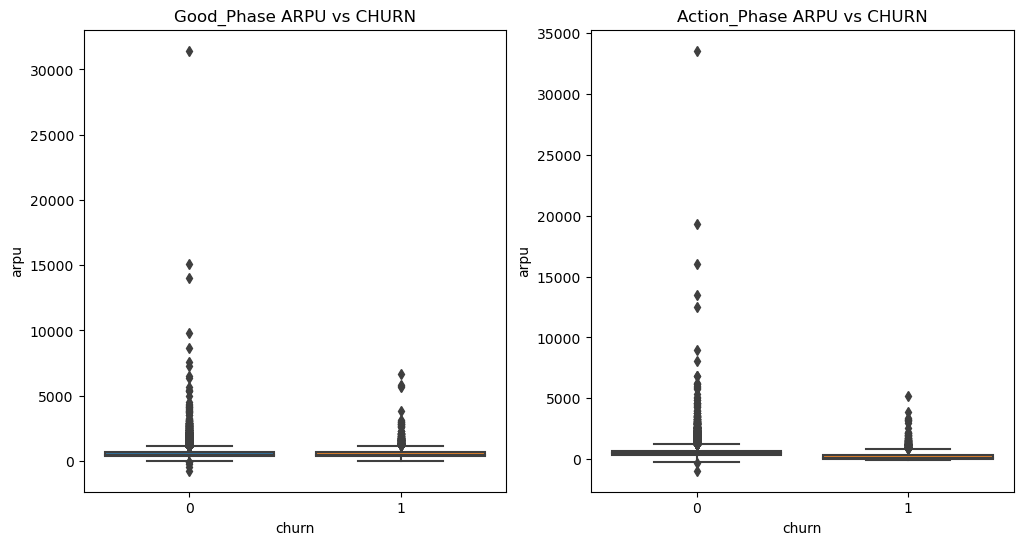

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(ax=axes[0],data = good_phase2,x='churn',y='arpu')
axes[0].set_title('Good_Phase ARPU vs CHURN')

sns.boxplot(ax=axes[1],data = action_phase2,x='churn',y='arpu')
axes[1].set_title('Action_Phase ARPU vs CHURN')

plt.show()

Inference
- Here in case of both the Good_phase and Action_Phase the arpu case in case of Non churning customers are comparable.
- In case of churned customers we can see clearly a decrease in arpu however in the action_phase.

#### 5.2.2 Onnet and Offnet vs Churn Rate

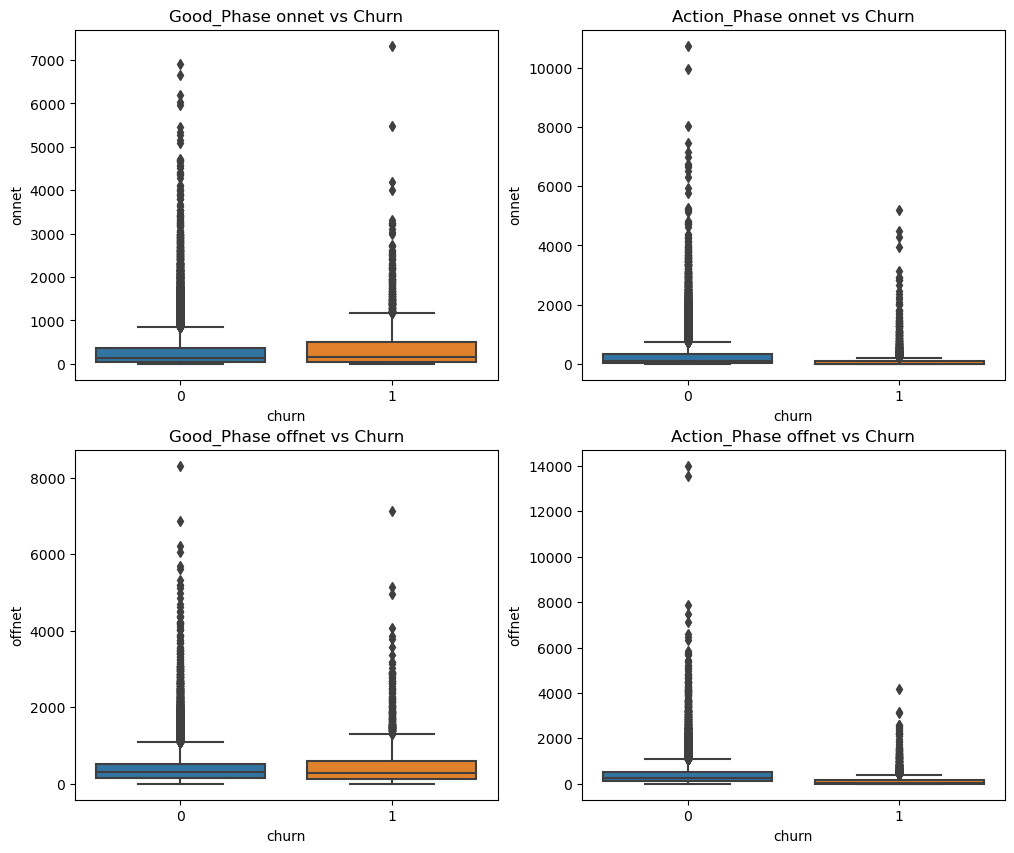

In [62]:
fig,axes = plt.subplots(2,2,figsize=(12,10))

sns.boxplot(ax = axes[0][0] ,data=good_phase2,x ='churn',y='onnet')
axes[0][0].set_title('Good_Phase onnet vs Churn')

sns.boxplot(ax = axes[0][1] ,data=action_phase2,x ='churn',y='onnet')
axes[0][1].set_title('Action_Phase onnet vs Churn')

sns.boxplot(ax = axes[1][0] ,data=good_phase2,x ='churn',y='offnet')
axes[1][0].set_title('Good_Phase offnet vs Churn')

sns.boxplot(ax = axes[1][1] ,data=action_phase2,x ='churn',y='offnet')
axes[1][1].set_title('Action_Phase offnet vs Churn')

plt.show()

Inference
- Clearly in both the scenarios of offnet and onnet it is very evident that customers who want to churn in the action phase the onnet and offnet is being reducted significantly.

#### 5.2.3 Total Roaming calls vs Churn

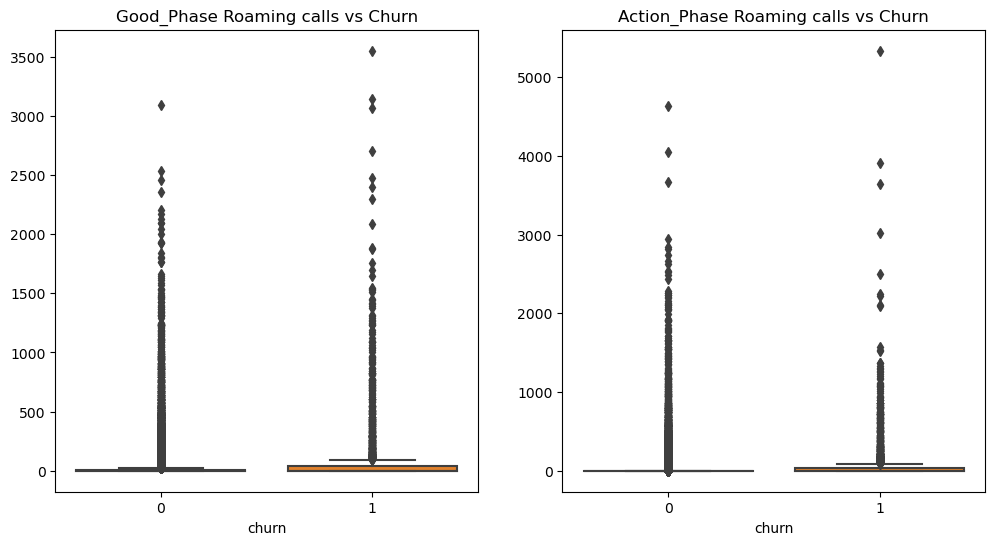

In [63]:
fig,axes = plt.subplots(1,2,figsize=(12,6))

sns.boxplot(ax = axes[0],data=good_phase2,x='churn',y=good_phase2['total_roam_ic']+good_phase2['total_roam_og'])
axes[0].set_title('Good_Phase Roaming calls vs Churn')

sns.boxplot(ax = axes[1],data=action_phase2,x='churn',y=action_phase2['total_roam_ic']+action_phase2['total_roam_og'])
axes[1].set_title('Action_Phase Roaming calls vs Churn')

plt.show()

Inference
- We do see the number of calls being reducted in case of action_phase.

#### 5.2.4 Outgoing calls vs Curn

### Note: Let's only compare the churned customers from now onwards

In [64]:
good_phase3=good_phase2[good_phase2['churn']==1]
action_phase3=action_phase2[action_phase2['churn']==1]

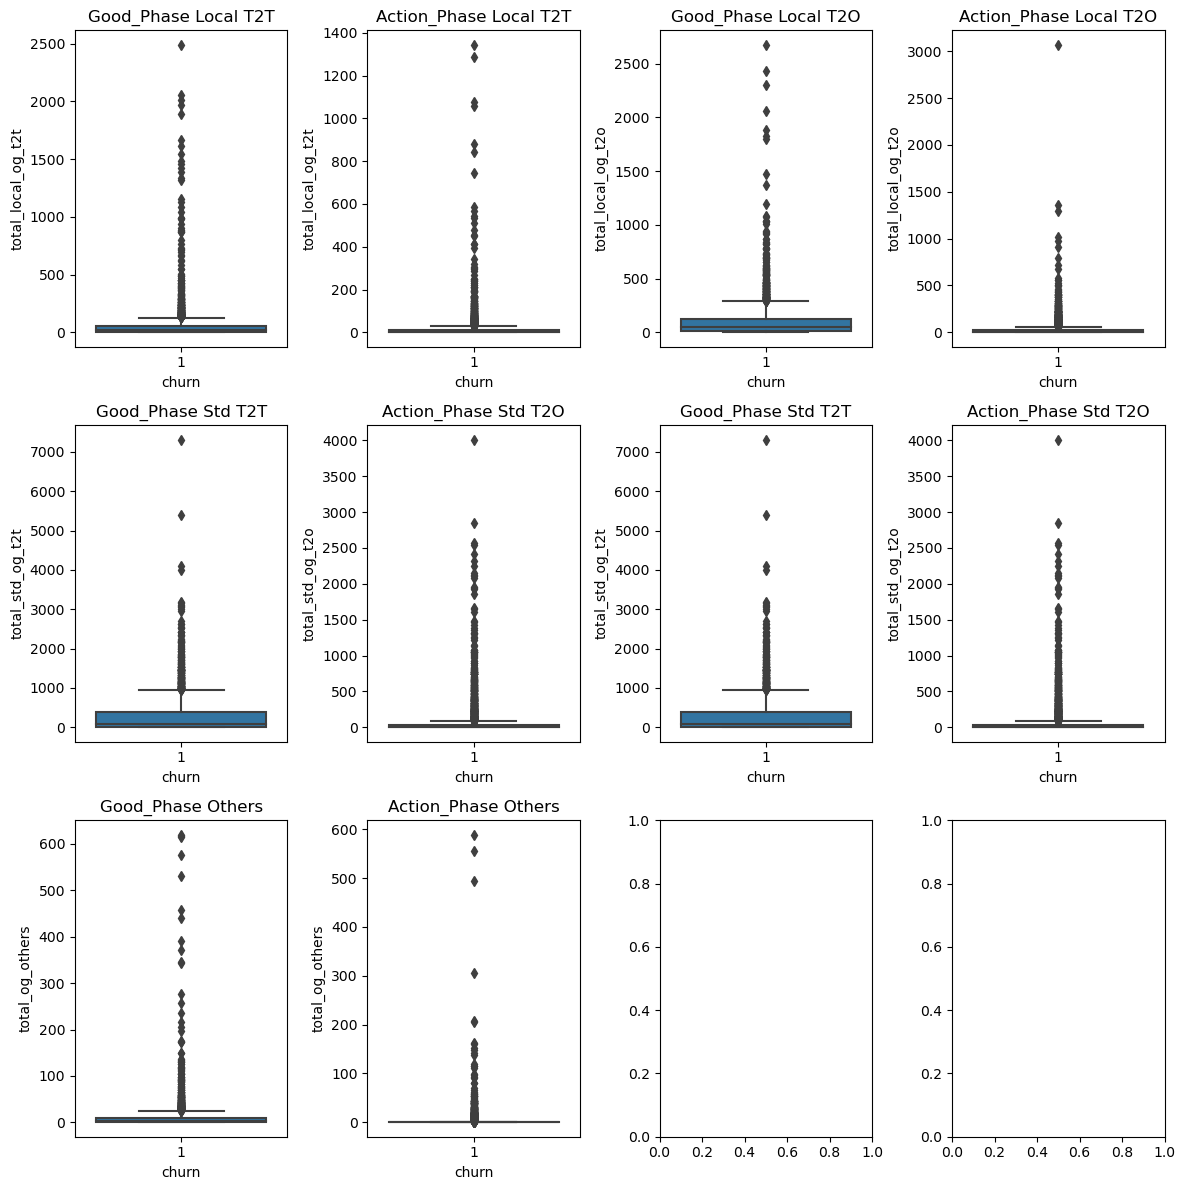

In [65]:
fig,axes = plt.subplots(3,4,figsize=(12,12))

sns.boxplot(ax=axes[0][0],data=good_phase3,x='churn',y='total_local_og_t2t')
axes[0][0].set_title('Good_Phase Local T2T')

sns.boxplot(ax=axes[0][1],data=action_phase3,x='churn',y='total_local_og_t2t')
axes[0][1].set_title('Action_Phase Local T2T')

sns.boxplot(ax=axes[0][2],data=good_phase3,x='churn',y='total_local_og_t2o')
axes[0][2].set_title('Good_Phase Local T2O')

sns.boxplot(ax=axes[0][3],data=action_phase3,x='churn',y='total_local_og_t2o')
axes[0][3].set_title('Action_Phase Local T2O')

sns.boxplot(ax=axes[1][0],data=good_phase3,x='churn',y='total_std_og_t2t')
axes[1][0].set_title('Good_Phase Std T2T')

sns.boxplot(ax=axes[1][1],data=action_phase3,x='churn',y='total_std_og_t2o')
axes[1][1].set_title('Action_Phase Std T2O')

sns.boxplot(ax=axes[1][2],data=good_phase3,x='churn',y='total_std_og_t2t')
axes[1][2].set_title('Good_Phase Std T2T')

sns.boxplot(ax=axes[1][3],data=action_phase3,x='churn',y='total_std_og_t2o')
axes[1][3].set_title('Action_Phase Std T2O')

sns.boxplot(ax=axes[2][0],data=good_phase3,x='churn',y='total_og_others')
axes[2][0].set_title('Good_Phase Others')

sns.boxplot(ax=axes[2][1],data=action_phase3,x='churn',y='total_og_others')
axes[2][1].set_title('Action_Phase Others')

plt.tight_layout()
plt.show()

Inference
- Here in every case we can see that the customers who are going to churn have already made up their mind and during the month of August it is quite evident their outgoing calls have significantly reducted.

#### 5.2.5 Incoming Calls vs churn

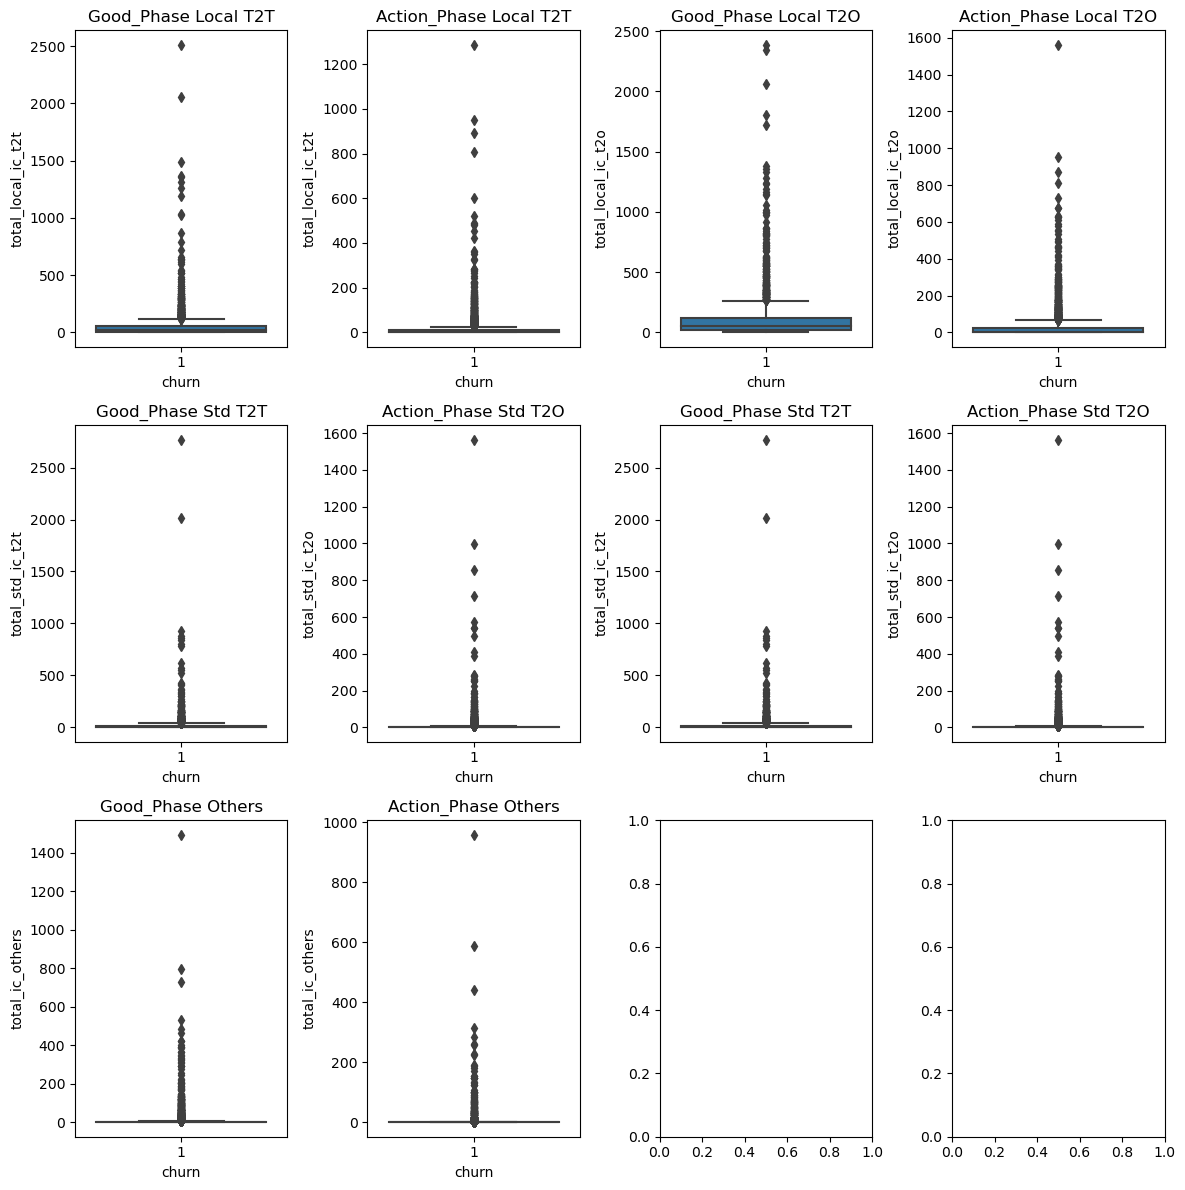

In [66]:
fig,axes = plt.subplots(3,4,figsize=(12,12))

sns.boxplot(ax=axes[0][0],data=good_phase3,x='churn',y='total_local_ic_t2t')
axes[0][0].set_title('Good_Phase Local T2T')

sns.boxplot(ax=axes[0][1],data=action_phase3,x='churn',y='total_local_ic_t2t')
axes[0][1].set_title('Action_Phase Local T2T')

sns.boxplot(ax=axes[0][2],data=good_phase3,x='churn',y='total_local_ic_t2o')
axes[0][2].set_title('Good_Phase Local T2O')

sns.boxplot(ax=axes[0][3],data=action_phase3,x='churn',y='total_local_ic_t2o')
axes[0][3].set_title('Action_Phase Local T2O')

sns.boxplot(ax=axes[1][0],data=good_phase3,x='churn',y='total_std_ic_t2t')
axes[1][0].set_title('Good_Phase Std T2T')

sns.boxplot(ax=axes[1][1],data=action_phase3,x='churn',y='total_std_ic_t2o')
axes[1][1].set_title('Action_Phase Std T2O')

sns.boxplot(ax=axes[1][2],data=good_phase3,x='churn',y='total_std_ic_t2t')
axes[1][2].set_title('Good_Phase Std T2T')

sns.boxplot(ax=axes[1][3],data=action_phase3,x='churn',y='total_std_ic_t2o')
axes[1][3].set_title('Action_Phase Std T2O')

sns.boxplot(ax=axes[2][0],data=good_phase3,x='churn',y='total_ic_others')
axes[2][0].set_title('Good_Phase Others')

sns.boxplot(ax=axes[2][1],data=action_phase3,x='churn',y='total_ic_others')
axes[2][1].set_title('Action_Phase Others')

plt.tight_layout()
plt.show()

Inference
- In case of incoming calls there is no observed changes since the people who are calling the customers are not aware that they are going to churn.

#### 5.2.6 Recharge vs Churn

In [67]:
action_phase3.columns

Index(['arpu', 'onnet', 'offnet', 'total_roam_ic', 'total_roam_og',
       'total_local_og_t2t', 'total_local_og_t2o', 'total_std_og_t2t',
       'total_std_og_t2o', 'total_og_others', 'total_og', 'total_local_ic_t2t',
       'total_local_ic_t2o', 'total_std_ic_t2t', 'total_std_ic_t2o',
       'total_ic_others', 'total_ic', 'total_amnt_recharge',
       'max_recharge_amount', 'last_day_recharge_amnt',
       'total_2g_internet_usage', 'total_3g_internet_usage', 'circle_id',
       'aon', 'vbc', 'churn', 'date_of_last_rech'],
      dtype='object')

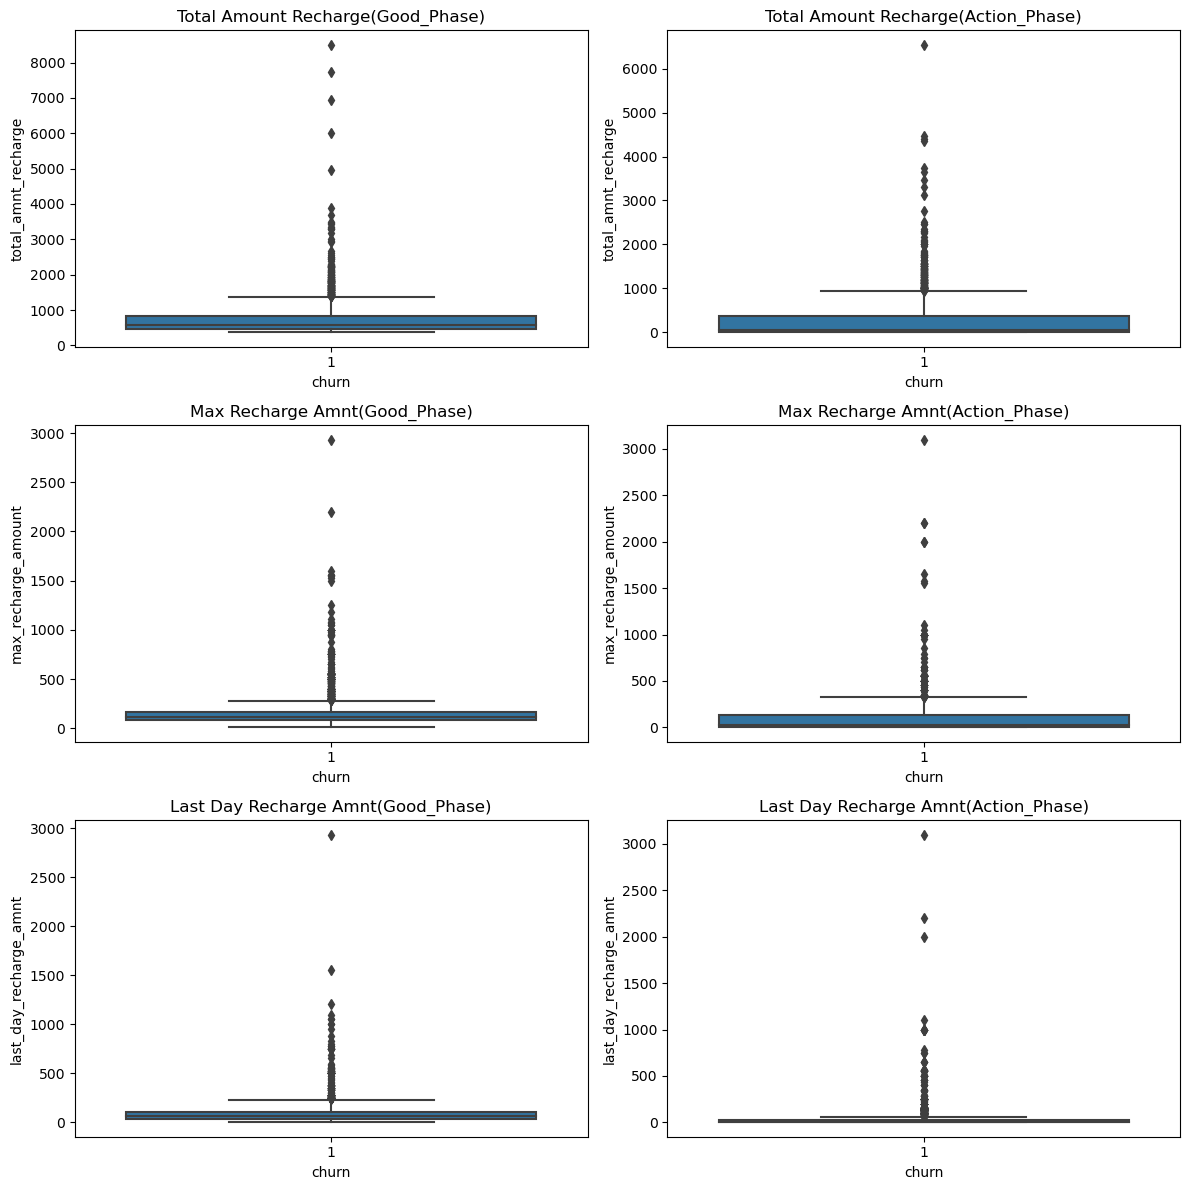

In [68]:
fig,axes =plt.subplots(3,2,figsize=(12,12))

sns.boxplot(ax=axes[0][0],data=good_phase3,x='churn',y='total_amnt_recharge')
axes[0][0].set_title('Total Amount Recharge(Good_Phase)')

sns.boxplot(ax=axes[0][1],data=action_phase3,x='churn',y='total_amnt_recharge')
axes[0][1].set_title('Total Amount Recharge(Action_Phase)')

sns.boxplot(ax=axes[1][0],data=good_phase3,x='churn',y='max_recharge_amount')
axes[1][0].set_title('Max Recharge Amnt(Good_Phase)')

sns.boxplot(ax=axes[1][1],data=action_phase3,x='churn',y='max_recharge_amount')
axes[1][1].set_title('Max Recharge Amnt(Action_Phase)')

sns.boxplot(ax=axes[2][0],data=good_phase3,x='churn',y='last_day_recharge_amnt')
axes[2][0].set_title('Last Day Recharge Amnt(Good_Phase)')

sns.boxplot(ax=axes[2][1],data=action_phase3,x='churn',y='last_day_recharge_amnt')
axes[2][1].set_title('Last Day Recharge Amnt(Action_Phase)')

plt.tight_layout()
plt.show()

Inference
- Apart from Max_recharge_amnt both the other variables such as last_day_recharge and total_amount_recharge shows a considerable decline in the action phase.

#### 5.2.7 Internet Usage vs Churn

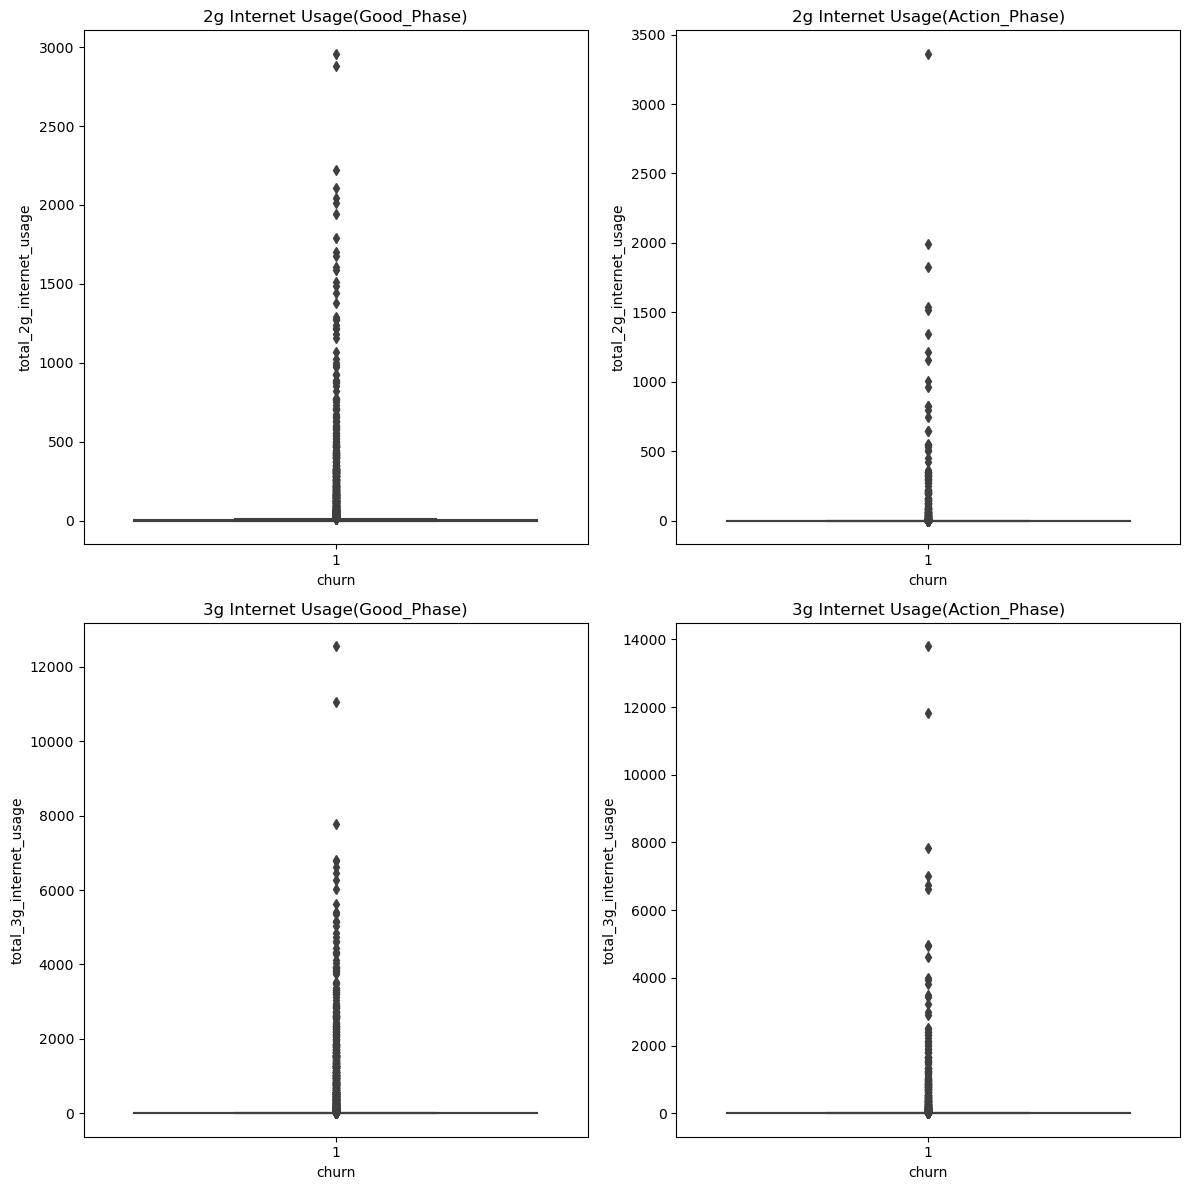

In [69]:
fig,axes =plt.subplots(2,2,figsize=(12,12))

sns.boxplot(ax=axes[0][0],data=good_phase3,x='churn',y='total_2g_internet_usage')
axes[0][0].set_title('2g Internet Usage(Good_Phase)')

sns.boxplot(ax=axes[0][1],data=action_phase3,x='churn',y='total_2g_internet_usage')
axes[0][1].set_title('2g Internet Usage(Action_Phase)')

sns.boxplot(ax=axes[1][0],data=good_phase3,x='churn',y='total_3g_internet_usage')
axes[1][0].set_title('3g Internet Usage(Good_Phase)')

sns.boxplot(ax=axes[1][1],data=action_phase3,x='churn',y='total_3g_internet_usage')
axes[1][1].set_title('3g Internet Usage(Action_Phase)')


plt.tight_layout()
plt.show()

Inference
- There is no considerable decrease of the internet usage when the customer is going to churn.

#### 5.2.8 Circle ID vs Churn

In [70]:
print(good_phase3['circle_id'].value_counts())
print(action_phase3['circle_id'].value_counts())

109    2593
Name: circle_id, dtype: int64
109    2593
Name: circle_id, dtype: int64


Inference
- It seems like all the customers who have churned have the cirlce id as the same i.e 2593. We can basically remove this column also.

#### 5.2.9  aon vs churn

In [71]:
#Getting the top 10 age of number to get an idea of how much days the customer has been with the network
aon = pd.DataFrame(good_phase3['aon'].value_counts().head(10)).reset_index()
aon.columns =['value','aon']

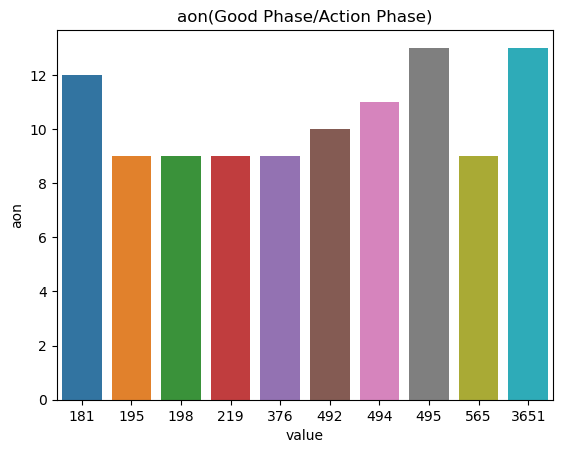

In [72]:
# bar plot
sns.barplot(data=aon,x='value',y='aon')
plt.title('aon(Good Phase/Action Phase)')
plt.show()

Inference
- Clearly the top 10 values are beyond the value of 181.
- Here as an anomaly people who have been with the network operator for 3651 days have been churning.
- All the other values aer below the value of 600.

In [73]:
good_phase3.columns

Index(['arpu', 'onnet', 'offnet', 'total_roam_ic', 'total_roam_og',
       'total_local_og_t2t', 'total_local_og_t2o', 'total_std_og_t2t',
       'total_std_og_t2o', 'total_og_others', 'total_og', 'total_local_ic_t2t',
       'total_local_ic_t2o', 'total_std_ic_t2t', 'total_std_ic_t2o',
       'total_ic_others', 'total_ic', 'total_amnt_recharge',
       'max_recharge_amount', 'last_day_recharge_amnt',
       'total_2g_internet_usage', 'total_3g_internet_usage', 'circle_id',
       'aon', 'vbc', 'churn', 'date_of_last_rech'],
      dtype='object')

#### 5.2.10 vbc vs Churn

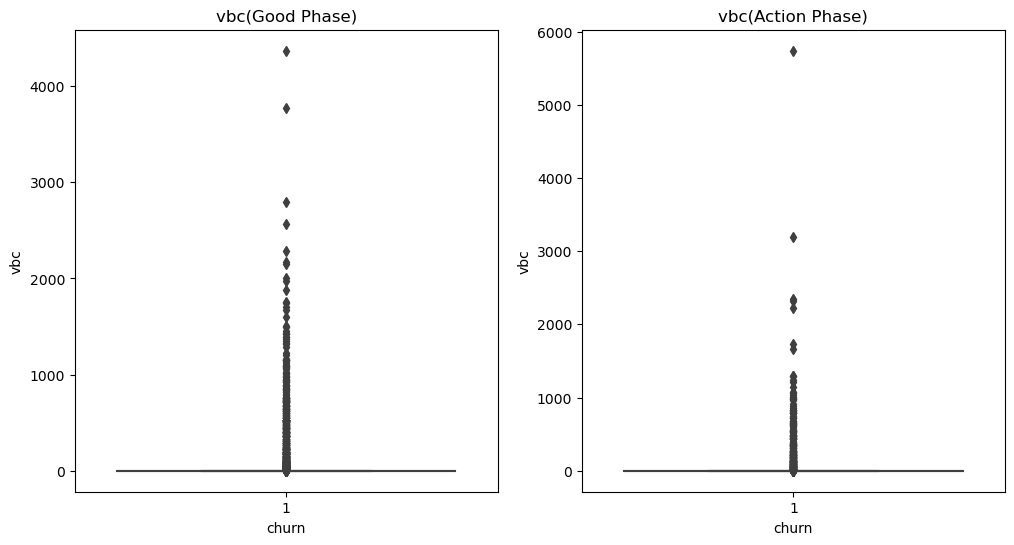

In [74]:
fig,axes= plt.subplots(1,2,figsize=(12,6))
sns.boxplot(ax =axes[0],data=good_phase3,x='churn',y='vbc')
axes[0].set_title('vbc(Good Phase)')

sns.boxplot(ax =axes[1],data=action_phase3,x='churn',y='vbc')
axes[1].set_title('vbc(Action Phase)')

plt.show()

Inference
- In the action phase clearly the variance is less as compared to good phase.

#### 5.2.11 Date of last recharge vs churn

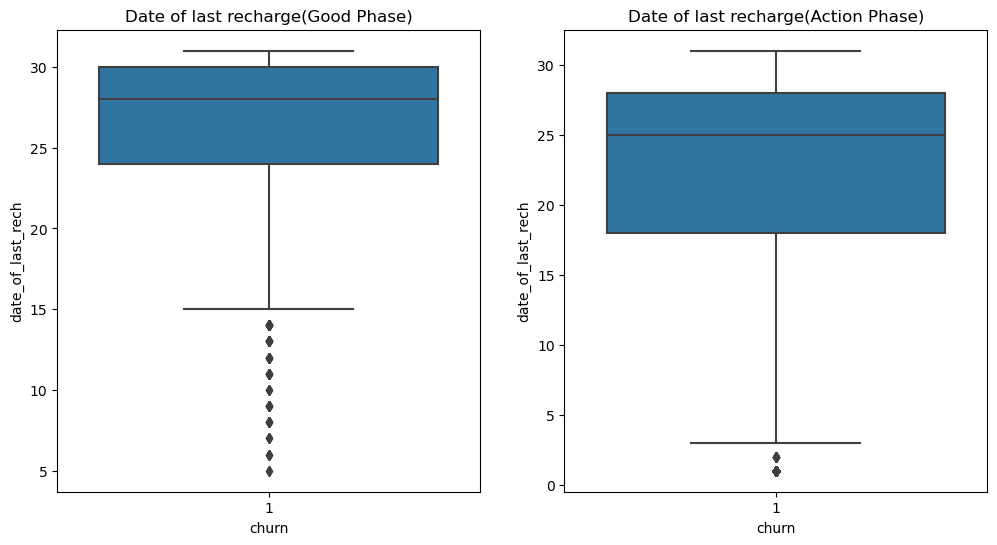

In [75]:
fig,axes= plt.subplots(1,2,figsize=(12,6))
sns.boxplot(ax =axes[0],data=good_phase3,x='churn',y='date_of_last_rech')
axes[0].set_title('Date of last recharge(Good Phase)')

sns.boxplot(ax =axes[1],data=action_phase3,x='churn',y='date_of_last_rech')
axes[1].set_title('Date of last recharge(Action Phase)')

plt.show()

Inference
- Once major difference we can see when in action phase almost 75% of people recharge before 28.
- In case of good phase almost 75% people recharge towards the date of 30.

### 5.2.2 Multivariate analysis

In [76]:
#Let's first drop the columns churn and circleid
good_phase3.drop(['churn','circle_id'],axis=1,inplace=True)
action_phase3.drop(['churn','circle_id'],axis=1,inplace=True)

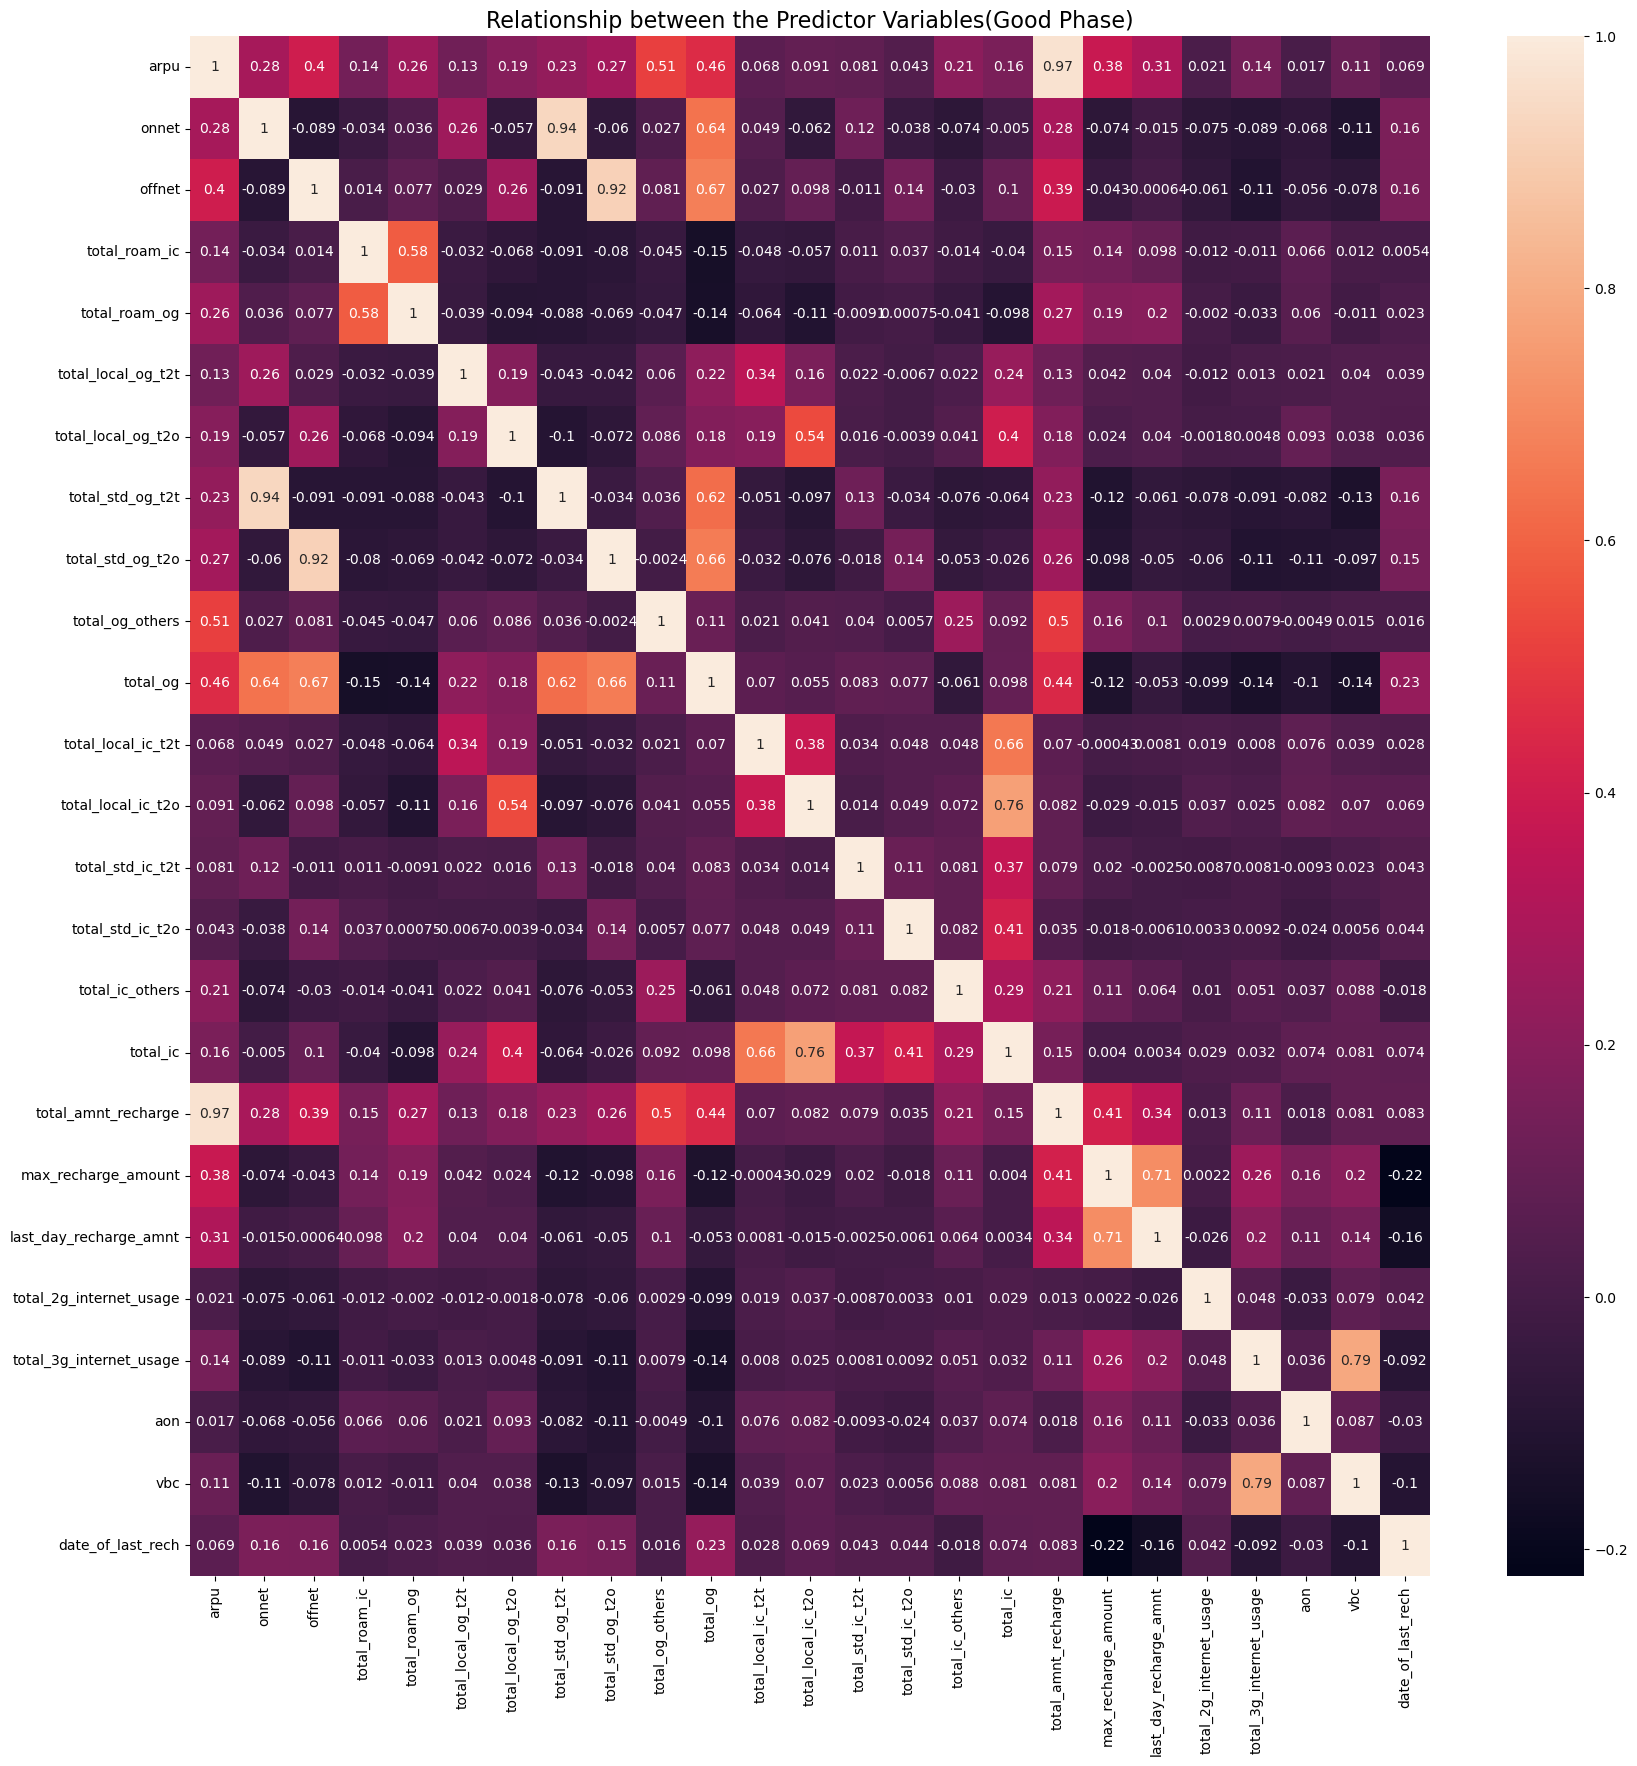

In [77]:
#Let's plot the heatmap here
plt.figure(figsize=(20,20))
sns.heatmap(good_phase3.corr(),annot=True)
plt.title('Relationship between the Predictor Variables(Good Phase)',fontsize=16)
plt.show()

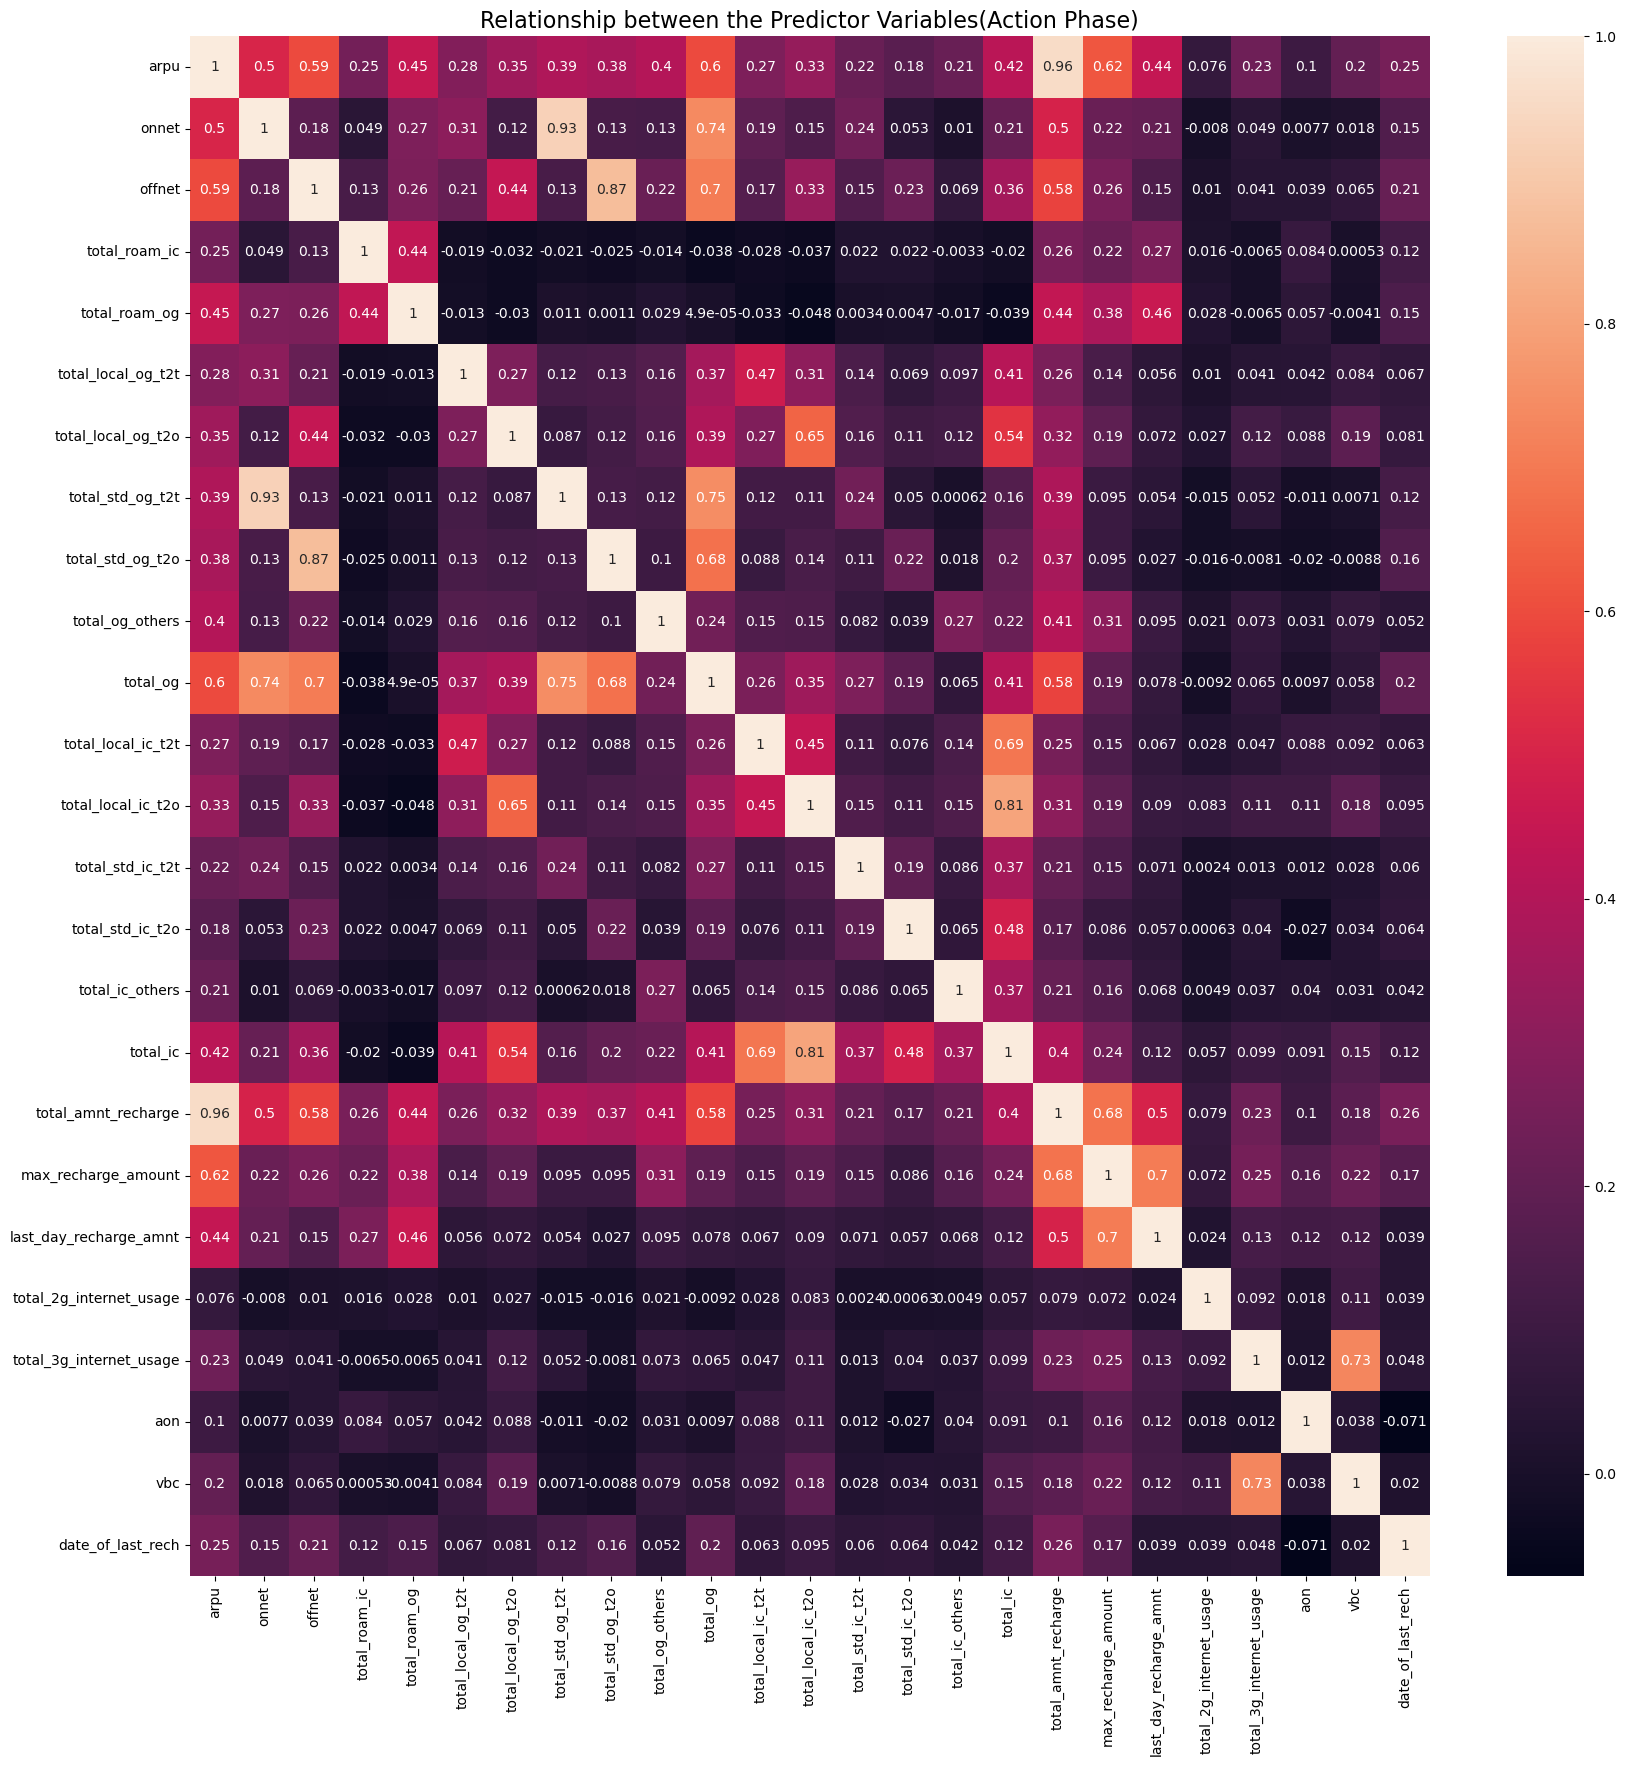

In [78]:
plt.figure(figsize=(20,20))
sns.heatmap(action_phase3.corr(),annot=True)
plt.title('Relationship between the Predictor Variables(Action Phase)',fontsize=16)
plt.show()

Inference
- Here in case of both the Good Phase and Action Phase we can say there is multicollinearity between the variables.

## 6. Feature Engineering

### 6.1 Creating a main dataframe

### 6.1.1.Creating some new columns from the existing columns for ease for the month 6

In [79]:
############# 1. Outgoing calls
###Local outgoing calls from network to network for month 6
good_phase['loc_og_t2t_mou_6'] = good_phase['loc_og_t2t_mou_6']+good_phase['loc_og_t2f_mou_6']+good_phase['loc_og_t2c_mou_6']
##Local outgoing calls from network to others for month 6
good_phase['loc_og_t2o_mou_6'] =good_phase['loc_og_t2m_mou_6']
#Dropping the aggregate columns and old columns to avoid confusion
good_phase.drop(['loc_og_t2f_mou_6','loc_og_t2c_mou_6','loc_og_t2m_mou_6','loc_og_mou_6'],axis=1,inplace=True)

#std outgoing calls from network to network
good_phase['std_og_t2t_mou_6'] = good_phase['std_og_t2t_mou_6']+good_phase['std_og_t2f_mou_6']
#std outgoing calls from network to others
good_phase['std_og_t2o_mou_6'] = good_phase['std_og_t2m_mou_6']
#Dropping the aggregate columns and old columns to avoid confusion
good_phase.drop(['std_og_t2f_mou_6','std_og_t2m_mou_6','std_og_mou_6'],axis=1,inplace=True)

# outgoing calls others
good_phase['og_others']=good_phase['isd_og_mou_6']+good_phase['spl_og_mou_6']+good_phase['og_others_6']
#Dropping the other columns
good_phase.drop(['isd_og_mou_6','spl_og_mou_6','og_others_6'],axis=1,inplace=True)

############## 2. Incoming calls
#Local incoming calls network to network
good_phase['loc_ic_t2t_mou_6'] = good_phase['loc_ic_t2t_mou_6']+good_phase['loc_ic_t2f_mou_6']+ good_phase['loc_ic_mou_6']
##Dropping columns
good_phase.drop(['loc_ic_t2f_mou_6','loc_ic_mou_6'],axis=1,inplace=True)

## local incoming calls others to network
good_phase['loc_ic_t2o_mou_6'] = good_phase['loc_ic_t2m_mou_6']
##Dropping columns
good_phase.drop(['loc_ic_t2m_mou_6'],axis=1,inplace=True)

## std incoming calls network to network
good_phase['std_ic_t2t_mou_6'] = good_phase['std_ic_t2t_mou_6']+good_phase['std_ic_t2f_mou_6']
##Dropping the columns
good_phase.drop(['std_ic_t2f_mou_6'],axis=1,inplace=True)

## std incoming calls others to network
good_phase['std_ic_t2o_mou_6'] = good_phase['std_ic_t2m_mou_6']
##Dropping the columns
good_phase.drop(['std_ic_t2m_mou_6'],axis=1,inplace=True)

## incoming calls others
good_phase['ic_others'] = good_phase['spl_ic_mou_6']+good_phase['isd_ic_mou_6']+good_phase['ic_others_6']
good_phase.drop(['spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6'],axis=1,inplace=True)

## converting the date column to day
good_phase['day_of_last_rech_6'] = pd.to_datetime(good_phase['date_of_last_rech_6']).dt.day
good_phase.drop(['date_of_last_rech_6'],axis=1,inplace=True)

### Performing the same operation for the 7th month 

In [80]:
############# 1. Outgoing calls
###Local outgoing calls from network to network for month 7
good_phase['loc_og_t2t_mou_7'] = good_phase['loc_og_t2t_mou_7']+good_phase['loc_og_t2f_mou_7']+good_phase['loc_og_t2c_mou_7']
##Local outgoing calls from network to others for month 7
good_phase['loc_og_t2o_mou_7'] =good_phase['loc_og_t2m_mou_7']
#Dropping the aggregate columns and old columns to avoid confusion
good_phase.drop(['loc_og_t2f_mou_7','loc_og_t2c_mou_7','loc_og_t2m_mou_7','loc_og_mou_7'],axis=1,inplace=True)

#std outgoing calls from network to network
good_phase['std_og_t2t_mou_7'] = good_phase['std_og_t2t_mou_7']+good_phase['std_og_t2f_mou_7']
#std outgoing calls from network to others
good_phase['std_og_t2o_mou_7'] = good_phase['std_og_t2m_mou_7']
#Dropping the aggregate columns and old columns to avoid confusion
good_phase.drop(['std_og_t2f_mou_7','std_og_t2m_mou_7','std_og_mou_7'],axis=1,inplace=True)

# ougoing calls others
good_phase['og_others']=good_phase['isd_og_mou_7']+good_phase['spl_og_mou_7']+good_phase['og_others_7']
#Dropping the other columns
good_phase.drop(['isd_og_mou_7', 'spl_og_mou_7', 'og_others_7'],axis=1,inplace=True)

############## 2. Incoming calls
#Local incoming calls network to network
good_phase['loc_ic_t2t_mou_7'] = good_phase['loc_ic_t2t_mou_7']+good_phase['loc_ic_t2f_mou_7']+ good_phase['loc_ic_mou_7']
##Dropping columns
good_phase.drop(['loc_ic_t2f_mou_7','loc_ic_mou_7'],axis=1,inplace=True)

## local incoming calls others to network
good_phase['loc_ic_t2o_mou_7'] = good_phase['loc_ic_t2m_mou_7']
##Dropping columns
good_phase.drop(['loc_ic_t2m_mou_7'],axis=1,inplace=True)

## std incoming calls network to network
good_phase['std_ic_t2t_mou_7'] = good_phase['std_ic_t2t_mou_7']+good_phase['std_ic_t2f_mou_7']
##Dropping the columns
good_phase.drop(['std_ic_t2f_mou_7'],axis=1,inplace=True)

## std incoming calls others to network
good_phase['std_ic_t2o_mou_7'] = good_phase['std_ic_t2m_mou_7']
##Dropping the columns
good_phase.drop(['std_ic_t2m_mou_7'],axis=1,inplace=True)

## incoming calls others
good_phase['ic_others'] = good_phase['spl_ic_mou_7']+good_phase['isd_ic_mou_7']+good_phase['ic_others_7']
good_phase.drop(['spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7'],axis=1,inplace=True)

## converting the date column to day
good_phase['day_of_last_rech_7'] = pd.to_datetime(good_phase['date_of_last_rech_7']).dt.day
good_phase.drop(['date_of_last_rech_7'],axis=1,inplace=True)

### Dropping some other columns as well

In [81]:
#both these columns have do not any significance
good_phase.drop(['mobile_number', 'circle_id'],axis=1,inplace=True)

### 6.1.2 Doing similar operations for action_phase dataset

In [82]:
############# 1. Outgoing calls
###Local outgoing calls from network to network for month 8
action_phase['loc_og_t2t_mou_8'] = action_phase['loc_og_t2t_mou_8']+action_phase['loc_og_t2f_mou_8']+action_phase['loc_og_t2c_mou_8']
##Local outgoing calls from network to others for month 8
action_phase['loc_og_t2o_mou_8'] =action_phase['loc_og_t2m_mou_8']
#Dropping the aggregate columns and old columns to avoid confusion
action_phase.drop(['loc_og_t2f_mou_8','loc_og_t2c_mou_8','loc_og_t2m_mou_8','loc_og_mou_8'],axis=1,inplace=True)

#std outgoing calls from network to network
action_phase['std_og_t2t_mou_8'] = action_phase['std_og_t2t_mou_8']+action_phase['std_og_t2f_mou_8']
#std outgoing calls from network to others
action_phase['std_og_t2o_mou_8'] = action_phase['std_og_t2m_mou_8']
#Dropping the aggregate columns and old columns to avoid confusion
action_phase.drop(['std_og_t2f_mou_8','std_og_t2m_mou_8','std_og_mou_8'],axis=1,inplace=True)

# outgoing calls others
action_phase['og_others']=action_phase['isd_og_mou_8']+action_phase['spl_og_mou_8']+action_phase['og_others_8']
#Dropping the other columns
action_phase.drop(['isd_og_mou_8','spl_og_mou_8','og_others_8'],axis=1,inplace=True)

############## 2. Incoming calls
#Local incoming calls network to network
action_phase['loc_ic_t2t_mou_8'] = action_phase['loc_ic_t2t_mou_8']+action_phase['loc_ic_t2f_mou_8']+ action_phase['loc_ic_mou_8']
##Dropping columns
action_phase.drop(['loc_ic_t2f_mou_8','loc_ic_mou_8'],axis=1,inplace=True)

## local incoming calls others to network
action_phase['loc_ic_t2o_mou_8'] = action_phase['loc_ic_t2m_mou_8']
##Dropping columns
action_phase.drop(['loc_ic_t2m_mou_8'],axis=1,inplace=True)

## std incoming calls network to network
action_phase['std_ic_t2t_mou_8'] = action_phase['std_ic_t2t_mou_8']+action_phase['std_ic_t2f_mou_8']
##Dropping the columns
action_phase.drop(['std_ic_t2f_mou_8'],axis=1,inplace=True)

## std incoming calls others to network
action_phase['std_ic_t2o_mou_8'] = action_phase['std_ic_t2m_mou_8']
##Dropping the columns
action_phase.drop(['std_ic_t2m_mou_8'],axis=1,inplace=True)

## incoming calls others
action_phase['ic_others'] = action_phase['spl_ic_mou_8']+action_phase['isd_ic_mou_8']+action_phase['ic_others_8']
action_phase.drop(['spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8'],axis=1,inplace=True)

## converting the date column to day
action_phase['day_of_last_rech_8'] = pd.to_datetime(action_phase['date_of_last_rech_8']).dt.day
action_phase.drop(['date_of_last_rech_8'],axis=1,inplace=True)

In [83]:
#both these columns have do not any significance
action_phase.drop(['mobile_number', 'circle_id'],axis=1,inplace=True)

In [84]:
good_phase.shape,action_phase.shape

((30011, 60), (30011, 32))

### 6.1.3 Merging both the dataframe

In [86]:
df_main = good_phase.merge(action_phase,left_index=True,right_index=True)
df_main

,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,std_og_t2t_mou_6,total_og_mou_6,loc_ic_t2t_mou_6,std_ic_t2t_mou_6,...,aon_y,aug_vbc_3g,churn_y,loc_og_t2o_mou_8,std_og_t2o_mou_8,og_others_y,loc_ic_t2o_mou_8,std_ic_t2o_mou_8,ic_others_y,day_of_last_rech_8
7,1069.180,57.84,453.43,16.23,23.74,113.52,10.96,487.53,638.18,89.08,...,802,57.74,1,162.28,49.14,16.51,121.19,141.33,46.73,26
8,378.721,413.69,94.66,0.00,0.00,297.13,116.56,508.36,105.27,0.00,...,315,21.03,0,50.54,75.69,10.23,15.48,0.65,0.00,30
13,492.846,501.76,413.31,23.53,7.98,54.17,446.41,907.09,288.27,115.68,...,2607,0.00,0,294.46,156.94,6.07,195.18,317.91,414.83,30
16,430.975,50.51,296.29,0.00,0.00,42.61,7.89,346.81,326.90,69.30,...,511,0.00,0,128.28,18.29,5.91,150.16,73.93,0.23,14
17,690.008,1185.91,61.64,0.00,0.00,38.99,1146.91,1249.53,116.50,8.63,...,667,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99970,261.269,5.01,329.58,5.06,46.04,5.17,0.00,288.54,32.80,0.00,...,1022,0.00,0,59.84,273.56,20.96,154.46,47.83,2.66,23
99974,414.303,17.56,428.41,0.00,0.00,12.82,9.59,451.24,110.60,11.33,...,3054,0.00,0,353.91,4.88,2.83,46.54,5.41,0.00,23
99986,644.973,806.73,784.76,0.00,0.00,741.45,97.51,1600.79,736.93,2.31,...,2696,497.45,0,493.48,88.94,9.15,450.01,23.71,0.00,18
99988,312.558,199.89,175.88,0.00,0.00,170.28,29.61,375.78,369.30,11.09,...,328,104.73,0,128.01,120.29,0.01,1122.83,86.11,0.31,29


In [87]:
## Dropping one of the churn columns
df_main.drop('churn_y',axis=1,inplace=True)
## Renaming churn column
df_main.rename({'churn_x':'churn'},axis=1,inplace=True)
df_main.shape

(30011, 91)

## 6.2 Splitting the dataset

In [88]:
#Predictor variables
X = df_main.drop('churn',axis=1)
#response variables
y = df_main['churn']

In [89]:
## Observing the response variable
y.value_counts()

0    27418
1     2593
Name: churn, dtype: int64

In [90]:
## splitting into train and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,train_size=0.7,test_size=0.3)

### 6.3 Scaling of the features into same scale

In [91]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X.columns)

## 6.4 Dimentionality Reduction

In [92]:
## PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

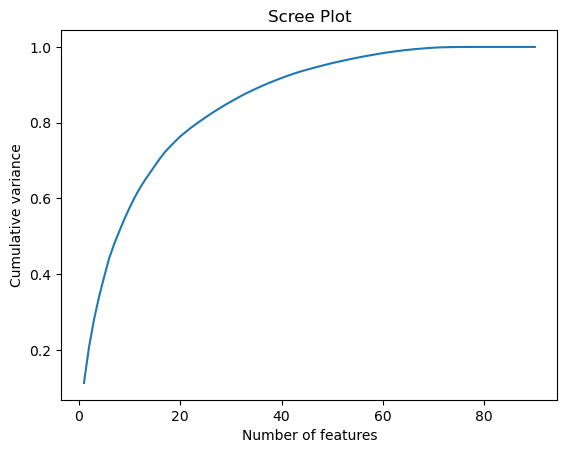

In [93]:
###Making a scree plot
var_cum = np.cumsum(pca.explained_variance_ratio_)
plt.figure()
plt.plot(range(1,len(var_cum)+1),var_cum)
plt.ylabel('Cumulative variance')
plt.xlabel('Number of features')
plt.title('Scree Plot')
plt.show()


- Here we can select about 45 components since it explains 95% of the variance

In [94]:
##Final pca
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=45)
X_train = pca_final.fit_transform(X_train)
X_test = pca_final.transform(X_test)

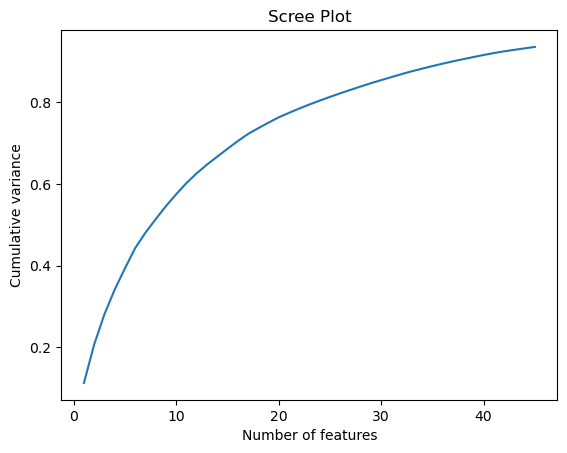

In [95]:
###Making a scree plot
var_cum = np.cumsum(pca_final.explained_variance_ratio_)
plt.figure()
plt.plot(range(1,len(var_cum)+1),var_cum)
plt.ylabel('Cumulative variance')
plt.xlabel('Number of features')
plt.title('Scree Plot')
plt.show()

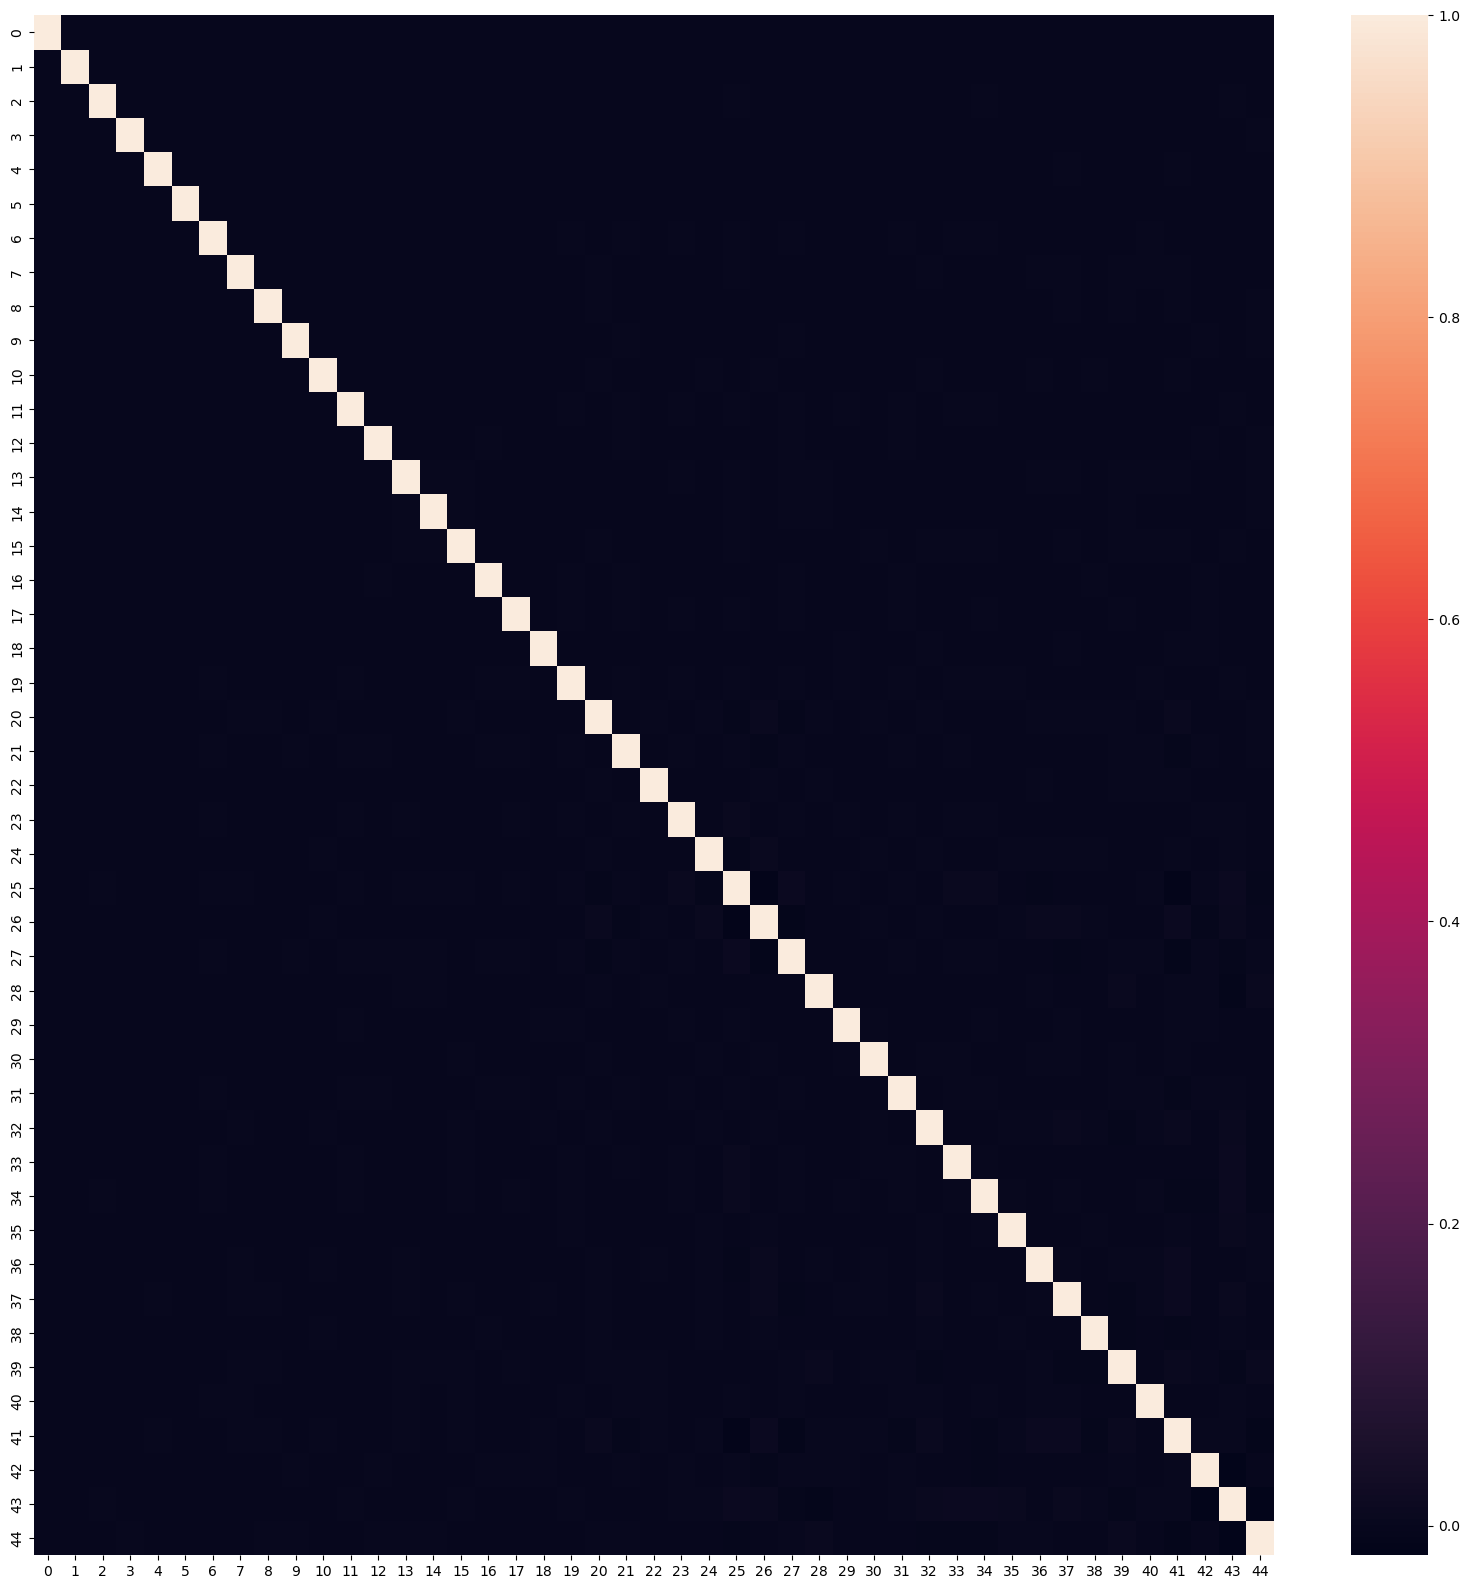

In [96]:
##Plotting a heatmap to check the multicollinearity
plt.figure(figsize=(20,20))
sns.heatmap(pd.DataFrame(X_train).corr())
plt.show()

- Clearly the multicollinearity has been eliminated. Now let's handle the imbalanced dataset.

## 6.5 Handling Data Imbalance

### 6.5.1 UnderSampling Technique

In [97]:
under_sample = RandomUnderSampler(random_state=42)
X_resampled_us,y_resampled_us = under_sample.fit_resample(X_train,y_train)
len(X_resampled_us)

3630

### 6.5.2 SMOTE

In [98]:
smt = SMOTE(random_state=42,k_neighbors=5)
X_resampled_smt,y_resampled_smt = smt.fit_resample(X_train,y_train)
len(X_resampled_smt)

38384

### 6.5.3 SMOTE + Tomek

In [99]:
smt_tmk = SMOTETomek(random_state=42)
X_resampled_smt_tmk, y_resampled_smt_tmk = smt_tmk.fit_resample(X_train,y_train)
len(X_resampled_smt_tmk)

38372

## 7. Model Building 

### 7.1 Logistic Regression

Note: Here we use accuracy and particularly focus on recall as metrics since we need to predict the churned customers correctly

In [100]:
## Undersampled dataset
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_resampled_us,y_resampled_us)
y_pred_train = logreg.predict(X_resampled_us)
y_pred = logreg.predict(X_test)
print('Accuracy Train:',accuracy_score(y_resampled_us,y_pred_train))
print('Accuracy Test:',accuracy_score(y_test,y_pred))
print('Recall:', recall_score(y_test,y_pred))

Accuracy Train: 0.8355371900826446
Accuracy Test: 0.8258551754775655
Recall: 0.8393316195372751


In [101]:
## Let's create a dataframe
res = pd.DataFrame(columns=['Model','Train score','Test score','Recall'])

In [102]:
res.loc[0] = ['Logistic Regression_undersampling',accuracy_score(y_resampled_us,y_pred_train),accuracy_score(y_test,y_pred),recall_score(y_test,y_pred)]

In [103]:
### SMOTE dataset
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_resampled_smt,y_resampled_smt)
y_pred_train = logreg.predict(X_resampled_smt)
y_pred = logreg.predict(X_test)
print('Accuracy Train:',accuracy_score(y_resampled_smt,y_pred_train))
print('Accuracy Test:',accuracy_score(y_test,y_pred))
print('Recall:', recall_score(y_test,y_pred))

Accuracy Train: 0.8446227594831179
Accuracy Test: 0.8338516215015549
Recall: 0.8264781491002571


In [104]:
res.loc[len(res)] = ['Logistic Regression_SMOTE',accuracy_score(y_resampled_smt,y_pred_train),accuracy_score(y_test,y_pred),recall_score(y_test,y_pred)]

In [105]:
## SMOTE Tomek dataset

In [106]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_resampled_smt_tmk,y_resampled_smt_tmk)
y_pred_train = logreg.predict(X_resampled_smt_tmk)
y_pred = logreg.predict(X_test)
print('Accuracy Train:',accuracy_score(y_resampled_smt_tmk,y_pred_train))
print('Accuracy Test:',accuracy_score(y_test,y_pred))
print('Recall:', recall_score(y_test,y_pred))

Accuracy Train: 0.8447305326800792
Accuracy Test: 0.8336294980008885
Recall: 0.8264781491002571


In [107]:
res.loc[len(res)] = ['Logistic Regression_SMOTE+TOmek',accuracy_score(y_resampled_smt_tmk,y_pred_train),accuracy_score(y_test,y_pred),recall_score(y_test,y_pred)]

### 7.2 Random Forest

In [108]:
## working with undersampled data
rf = RandomForestClassifier(max_depth=3)
rf.fit(X_resampled_us,y_resampled_us)
y_pred_train = rf.predict(X_resampled_us)
y_pred = rf.predict(X_test)
print('Accuracy Train:',accuracy_score(y_resampled_us,y_pred_train))
print('Accuracy Test:',accuracy_score(y_test,y_pred))
print('Recall:', recall_score(y_test,y_pred))

Accuracy Train: 0.8217630853994491
Accuracy Test: 0.818969346956908
Recall: 0.8033419023136247


In [109]:
res.loc[len(res)] = ['Random Forest_undersampling',accuracy_score(y_resampled_us,y_pred_train),accuracy_score(y_test,y_pred),recall_score(y_test,y_pred)]

- This model is overfitting since we can see the Training accuracy is 100%.

In [110]:
## working with SMOTE data
rf = RandomForestClassifier(max_depth=3)
rf.fit(X_resampled_smt,y_resampled_smt)
y_pred_train = rf.predict(X_resampled_smt)
y_pred = rf.predict(X_test)
print('Accuracy Train:',accuracy_score(y_resampled_smt,y_pred_train))
print('Accuracy Test:',accuracy_score(y_test,y_pred))
print('Recall:', recall_score(y_test,y_pred))
res.loc[len(res)] = ['Random Forest_SMOTE',accuracy_score(y_resampled_smt,y_pred_train),accuracy_score(y_test,y_pred),recall_score(y_test,y_pred)]

Accuracy Train: 0.8212536473530638
Accuracy Test: 0.8247445579742336
Recall: 0.7969151670951157


In [111]:
## working with SMOTE+Tomek data
rf = RandomForestClassifier(max_depth=3)
rf.fit(X_resampled_smt_tmk,y_resampled_smt_tmk)
y_pred_train = rf.predict(X_resampled_smt_tmk)
y_pred = rf.predict(X_test)
print('Accuracy Train:',accuracy_score(y_resampled_smt_tmk,y_pred_train))
print('Accuracy Test:',accuracy_score(y_test,y_pred))
print('Recall:', recall_score(y_test,y_pred))
res.loc[len(res)] = ['Random Forest_SMOTE+Tomek',accuracy_score(y_resampled_smt_tmk,y_pred_train),accuracy_score(y_test,y_pred),recall_score(y_test,y_pred)]

Accuracy Train: 0.8268268529135828
Accuracy Test: 0.8255219902265659
Recall: 0.7840616966580977


### 7.3 XGBoost

In [112]:
## working with undersampled data
xgb = XGBClassifier(max_depth=3)
xgb.fit(X_resampled_us,y_resampled_us)
y_pred_train = xgb.predict(X_resampled_us)
y_pred = xgb.predict(X_test)
print('Accuracy Train:',accuracy_score(y_resampled_us,y_pred_train))
print('Accuracy Test:',accuracy_score(y_test,y_pred))
print('Recall:', recall_score(y_test,y_pred))
res.loc[len(res)] = ['XGBoost_undersampling',accuracy_score(y_resampled_us,y_pred_train),accuracy_score(y_test,y_pred),recall_score(y_test,y_pred)]

Accuracy Train: 0.9424242424242424
Accuracy Test: 0.8239671257219013
Recall: 0.8149100257069408


In [113]:
## working with SMOTE data
xgb = XGBClassifier(max_depth=3)
xgb.fit(X_resampled_smt,y_resampled_smt)
y_pred_train = xgb.predict(X_resampled_smt)
y_pred = xgb.predict(X_test)
print('Accuracy Train:',accuracy_score(y_resampled_smt,y_pred_train))
print('Accuracy Test:',accuracy_score(y_test,y_pred))
print('Recall:', recall_score(y_test,y_pred))
res.loc[len(res)] = ['XGBoost_SMOTE',accuracy_score(y_resampled_smt,y_pred_train),accuracy_score(y_test,y_pred),recall_score(y_test,y_pred)]

Accuracy Train: 0.8991246352646937
Accuracy Test: 0.8647267880941804
Recall: 0.7904884318766067


In [114]:
## working with SMOTE+Tomek data
xgb = XGBClassifier(max_depth=3)
xgb.fit(X_resampled_smt_tmk,y_resampled_smt_tmk)
y_pred_train = xgb.predict(X_resampled_smt_tmk)
y_pred = xgb.predict(X_test)
print('Accuracy Train:',accuracy_score(y_resampled_smt_tmk,y_pred_train))
print('Accuracy Test:',accuracy_score(y_test,y_pred))
print('Recall:', recall_score(y_test,y_pred))
res.loc[len(res)] = ['XGBoost_SMOTE+Tomek',accuracy_score(y_resampled_smt_tmk,y_pred_train),accuracy_score(y_test,y_pred),recall_score(y_test,y_pred)]

Accuracy Train: 0.8972427811946211
Accuracy Test: 0.8653931585961795
Recall: 0.7892030848329049


In [115]:
## Observing our dataframe
res.sort_values(by='Recall',ascending=False)

,Model,Train score,Test score,Recall
0,Logistic Regression_undersampling,0.835537,0.825855,0.839332
1,Logistic Regression_SMOTE,0.844623,0.833852,0.826478
2,Logistic Regression_SMOTE+TOmek,0.844731,0.833629,0.826478
6,XGBoost_undersampling,0.942424,0.823967,0.814910
3,Random Forest_undersampling,0.821763,0.818969,0.803342
4,Random Forest_SMOTE,0.821254,0.824745,0.796915
7,XGBoost_SMOTE,0.899125,0.864727,0.790488
8,XGBoost_SMOTE+Tomek,0.897243,0.865393,0.789203
5,Random Forest_SMOTE+Tomek,0.826827,0.825522,0.784062


Inference
- It seems that logistic Regression is the most suited model since the Recall score is extremely good as compared to that of Ensemble Techniques, however we will pickup Random Forest_SMOTE model we have created to check the hyperparameters and check if we can improve the score or not.
- Let's pickup one more model XGBoost_SMOTE+Tomek and do hyperparameter tuning for these also.
- The reason we have picked up these models is to ensure that model is not too overfitted.

## 8. Hyperparameter Tuning

### 8.1 Logistic Regression Undersampling

In [116]:
## Hyperparamters 
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
logreg = LogisticRegression()
grid_search = GridSearchCV(estimator=logreg,param_grid=param_grid,cv=5,scoring='recall',verbose=3,n_jobs=-1)
grid_search.fit(X_resampled_us,y_resampled_us)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='recall', verbose=3)

In [117]:
logreg = grid_search.best_estimator_
y_pred_train = logreg.predict(X_resampled_us)
y_pred = logreg.predict(X_test)
res1 = pd.DataFrame(columns = ['Model','Train','Test','Recall'])
res1.loc[len(res1)] = ['Logistic Regression_undersampling',accuracy_score(y_resampled_us,y_pred_train),accuracy_score(y_test,y_pred),recall_score(y_test,y_pred)]

### 8.2 Random Forest SMOTE

In [119]:

rf = RandomForestClassifier(max_depth=3)
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}
random_search = RandomizedSearchCV(estimator=rf,param_distributions=param_grid,cv=5,scoring='recall',verbose=3,n_jobs=-1)
random_search.fit(X_resampled_smt,y_resampled_smt)

rf = random_search.best_estimator_
y_pred_train = rf.predict(X_resampled_smt)
y_pred = rf.predict(X_test)

res1.loc[len(res1)] = ['Random Forest_SMOTE',accuracy_score(y_resampled_smt,y_pred_train),accuracy_score(y_test,y_pred),recall_score(y_test,y_pred)]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


### 8.3 XG Boost SMOTE+Tomek

In [120]:
xgb = XGBClassifier(max_depth=3)
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}
random_search = RandomizedSearchCV(estimator=xgb,param_distributions=param_grid,cv=5,scoring='recall',verbose=3,n_jobs=-1)
random_search.fit(X_resampled_smt_tmk,y_resampled_smt_tmk)

xgb = random_search.best_estimator_
y_pred_train = xgb.predict(X_resampled_smt_tmk)
y_pred = xgb.predict(X_test)

res1.loc[len(res1)] = ['XGBoost_SMOTE+Tomek',accuracy_score(y_resampled_smt_tmk,y_pred_train),accuracy_score(y_test,y_pred),recall_score(y_test,y_pred)]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [121]:
res1

,Model,Train,Test,Recall
0,Logistic Regression_undersampling,0.794490,0.688916,0.883033
1,Random Forest_SMOTE,0.820316,0.819636,0.789203
2,XGBoost_SMOTE+Tomek,0.925623,0.876944,0.760925


In [123]:
res

,Model,Train score,Test score,Recall
0,Logistic Regression_undersampling,0.835537,0.825855,0.839332
1,Logistic Regression_SMOTE,0.844623,0.833852,0.826478
2,Logistic Regression_SMOTE+TOmek,0.844731,0.833629,0.826478
3,Random Forest_undersampling,0.821763,0.818969,0.803342
4,Random Forest_SMOTE,0.821254,0.824745,0.796915
5,Random Forest_SMOTE+Tomek,0.826827,0.825522,0.784062
6,XGBoost_undersampling,0.942424,0.823967,0.814910
7,XGBoost_SMOTE,0.899125,0.864727,0.790488
8,XGBoost_SMOTE+Tomek,0.897243,0.865393,0.789203


Inference
- Seems like Logistic Regreesion is giving us the most perfect Recall score.
- However in the process we have given up on the accuracy score on our train and test dataset.
- The model is little overfitted however our aim of getting the precision getting better is sorted out.

### 9. Feature Importances

### 9.1 Random Forest Classifier

In [139]:
scores = rf.feature_importances_

In [131]:
cols = list(df_main.drop('churn',axis=1).columns)[:len(scores)]

In [134]:
pd.DataFrame({'Features':cols,
             'Scores':scores}).sort_values(by='Scores',ascending=False).head(10)

,Features,Scores
0,arpu_6,0.199284
9,std_ic_t2t_mou_6,0.177758
17,vol_3g_mb_6,0.104274
3,roam_ic_mou_6,0.078902
7,total_og_mou_6,0.069268
1,onnet_mou_6,0.046913
14,max_rech_amt_6,0.040583
12,total_rech_num_6,0.036188
2,offnet_mou_6,0.031470
18,monthly_2g_6,0.027861


### 9.2 XGBoost Classifier

In [136]:
scores =xgb.feature_importances_

In [137]:
cols = list(df_main.drop('churn',axis=1).columns)[:len(scores)]
pd.DataFrame({'Features':cols,
             'Scores':scores}).sort_values(by='Scores',ascending=False).head(10)

,Features,Scores
9,std_ic_t2t_mou_6,0.105514
0,arpu_6,0.085881
17,vol_3g_mb_6,0.075644
7,total_og_mou_6,0.044593
8,loc_ic_t2t_mou_6,0.044430
12,total_rech_num_6,0.041559
1,onnet_mou_6,0.038710
3,roam_ic_mou_6,0.037655
18,monthly_2g_6,0.028932
4,roam_og_mou_6,0.028535


### 9.3 RFE using Logistic Regression

In [174]:
from sklearn.feature_selection import RFE
logreg = LogisticRegression(random_state=42)
rfe =RFE(estimator=logreg,n_features_to_select=10)
rfe.fit(X_resampled_smt_tmk,y_resampled_smt_tmk)

RFE(estimator=LogisticRegression(random_state=42), n_features_to_select=10)

In [176]:
## Rfe rankings of our columns
rfecv.ranking_

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [182]:
# Top 10 features as per rfe rankings
pd.DataFrame({'Features':df_main.drop('churn',axis=1).columns[:len(rfe.support_)][rfe.support_]})

,Features
0,arpu_6
1,onnet_mou_6
2,roam_og_mou_6
3,std_ic_t2t_mou_6
4,total_rech_num_6
5,vol_3g_mb_6
6,sachet_3g_6
7,roam_ic_mou_7
8,loc_og_t2t_mou_7
9,sachet_2g_7


Inference
- We can clearly see that the top 10 features associated with both the best Ensemble Models have almost the same features.
- Since our model is more usage based therefore it is quite clear that more top features are associated with std calling, internet usage, romaing calls, total network to network calls.
- Other interesting thing we note is that even though we have created a usage based model, the ML models clearly suggest that arpu is an important metric and cannot be ignored.
- Other interesting thing we note is all the metrics are for the first month and this might be because of the pca we have done.
- In case of RFE we have done there seems to be including the variables in the second month also. Thse all features apart from arpu are all usage based metrics.

## 10. Conclusion

- Focus on the top 10 features of the features importances and make important decisions as per the list.
- We have built ensemble models and logistic regression model which performs pretty well. However the simple Logistic Regression came out on top.
- Then it comes to choose between the imbalance dataset. We can probably choose the SMOTE+Tomek dataset since it includes both oversampling and undersampling.
- The Top features gives us an idea that customer churn is both based on revenue based and usage based. We cannot come into conclusion that it depends on only revenue or usage.